# Neural Network

* Artificial neural network (in particular deep NN) is the most popular machine learning method these days

* They are inspired by human brains (at least initially)

* Artifical neuron is a mathematical function

* Neurons are connected with each other (kind of synapses)

* Usually connections have some weights

* Today, feedforward neural networks (multilayer perceptrons) will be discussed

* However, before we go there, lets start with linear and logistic regression

In [0]:
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

## Linear regression

* Lets consider dataset $\left\{(\vec x^{(i)}, y^{(i)}); i = 1,\cdots, N\right\}$

* where explanatory variables (**features**) $\vec x^{(i)} = (x^{(i)}_1,\cdots, x^{(i)}_n) \in \mathcal{R}^n$

* and dependent variables (**targets**) $y^{(i)} \in \mathcal{R}$

* Lets define the **hypothesis**: <p align="center"><br>$h(\vec x) = w_0 + w_1x_1 + \cdots w_nx_n$</p><br>

* In other words we claim that $y^{(i)}$ can be calculated from $h(\vec x^{(i)})$, if we know **weights** $w_i$

* For convenience lets set $x^{(i)}_0 = 1$, so we can rewrite the hypothesis: <p align="center"><br>$h(\vec x) = \sum_{i=0}^nw_ix_i = \vec w \cdot \vec x$</p><br>

### Normal equation

* One could find weights using normal equation

* Let $Y^T = (y^{(1)}, \cdots, y^{(N)})$, $X^T = \left((\vec x^{(1)})^T, \cdots, (\vec x^{(N)})^T\right)$ and $W^T = (w_0, \cdots, w_n)$

* Then we can write a matrix equation: <p align="center"><br>$Y = XW$</p><br>

* The normal equation (minimizing the sum of the square differences between left and right sides): <p align="center"><br>$X^TY = X^TXW$</p><br>

* Thus, one could find weights by calculating: <p align="center"><br>$W = (X^TX)^{-1}X^TY$</p><br>

* Doable, but computational expensive

### Gradient descent

* Gradient descent is an iterative algorithm for finding the minimum

* For linear regression the **cost function** (or **loss function**) is given by mean squared error: <p align="center"><br>$L(\vec w) = \frac{1}{2N}\sum\limits_{i=1}^N\left(h(\vec x^{(i)}) - y^{(i)}\right)^2$</p><br>

* It measures the quality of given set of parameters / weights

* Please note, that $\frac{1}{2}$ is added for convenience to MSE definition

* In gradient descent method weights are updated w.r.t. the gradient of cost function: <p align="center"><br>$w_j \rightarrow w_j - \alpha\frac{\partial L(\vec w)}{\partial w_j} = w_j - \frac{\alpha}{N}\sum\limits_{i=1}^{N}\left(h(\vec x^{(i)}) - y^{(i)}\right)x^{(i)}_j$</p><br>

* Where $\alpha$ is training rate

### Example

* Lets generate some fake data according to $y = ax + b$ for given slope and intercept

* And add some noise to $y$

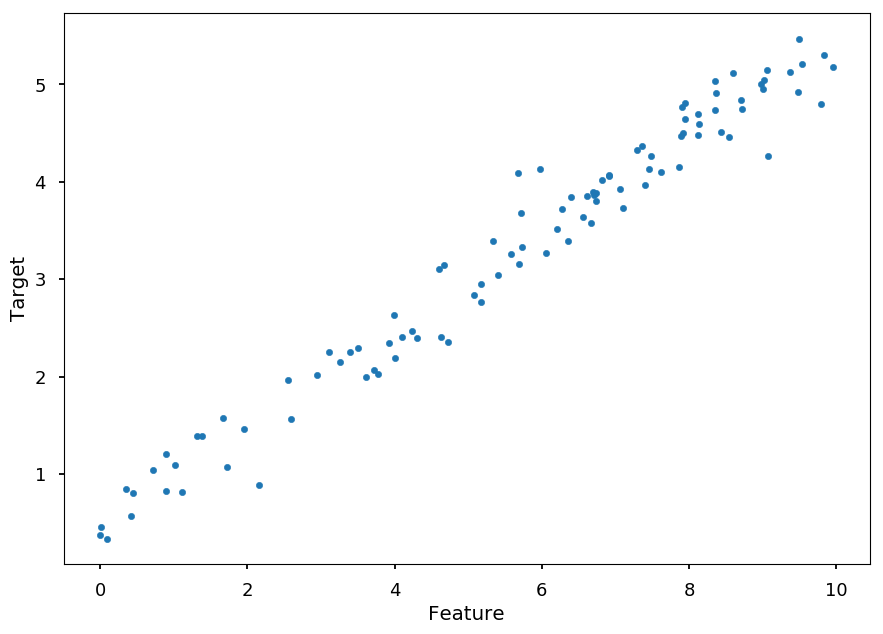

In [0]:
### SETTINGS ###

N = 100 # number of samples

a = 0.50 # slope
b = 0.50 # y-intercept
s = 0.25 # sigma

### GENERATE SAMPLES ###

X = (10.0 * np.random.sample(N))                               # features
Y = [(a * X[i] + b) + np.random.normal(0,s) for i in range(N)] # targets

### PLOT SAMPLES ###

plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(X, Y, marker='.');

* It is time to learn about new framework

> Theano is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. It can use GPUs and perform efficient symbolic differentiation.

In [0]:
!pip install theano

* In this example the hypothesis is given by: <p align="center"><br>$h(x) = \vec w \cdot \vec x = ax + b$</p><br>

* where $\vec w = (b, a)$ and $\vec x = (1, x)$

* Lets first create symbolic variable for:

    * feature vector $X = (x_1, \cdots, x_N)$
    
    * target $Y = (y_1, \cdots, y_N)$
    
    * weights $a$ and $b$ (or $w_1$ and $w_0$)

In [0]:
import theano
import theano.tensor as T

x = T.vector('x') # feature vector
y = T.vector('y') # target vector

# weights initialized randomly
#a = theano.shared(np.random.randn(), name = 'w')
#b = theano.shared(np.random.randn(), name = 'b')

# initial weights by hand for demonstration (random may be to close)
a = theano.shared(-0.5, name = 'w')
b = theano.shared(1.0, name = 'b')

* Having that, we can define:

    * hypothesis
    
    * cost function
    
    * gradients

In [0]:
pred = T.dot(x, a) + b                 # hyphothesis
cost = T.sum(T.pow(pred - y, 2)) / N   # cost function
grad_a, grad_b = T.grad(cost, [a, b])  # gradients

* And finally, we define gradient descent method (which also returns the value of the cost function)

In [0]:
alpha = 0.005 # learning rate

# at each training step we update weights:
# w -> w - alpha * grad_w and b -> b - alpha * grad_b
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((a, a - alpha * grad_a),
                                   (b, b - alpha * grad_b)))

* Each training step involves the full cycle on training data (**epoch**)

In [0]:
n_epochs = 1000  # number of training steps / epochs
costs = []       # to keep track on the value of cost function on each step
weights = []     # to store few set of weights

keep = (0, 10, 100, 500, 1000)  # save result for some epochs passed

for i in range(n_epochs + 1):
  if i in keep:
    weights.append((a.get_value(), b.get_value()))
    
  costs.append(train(X, Y))

* Finally, we can visualize the results

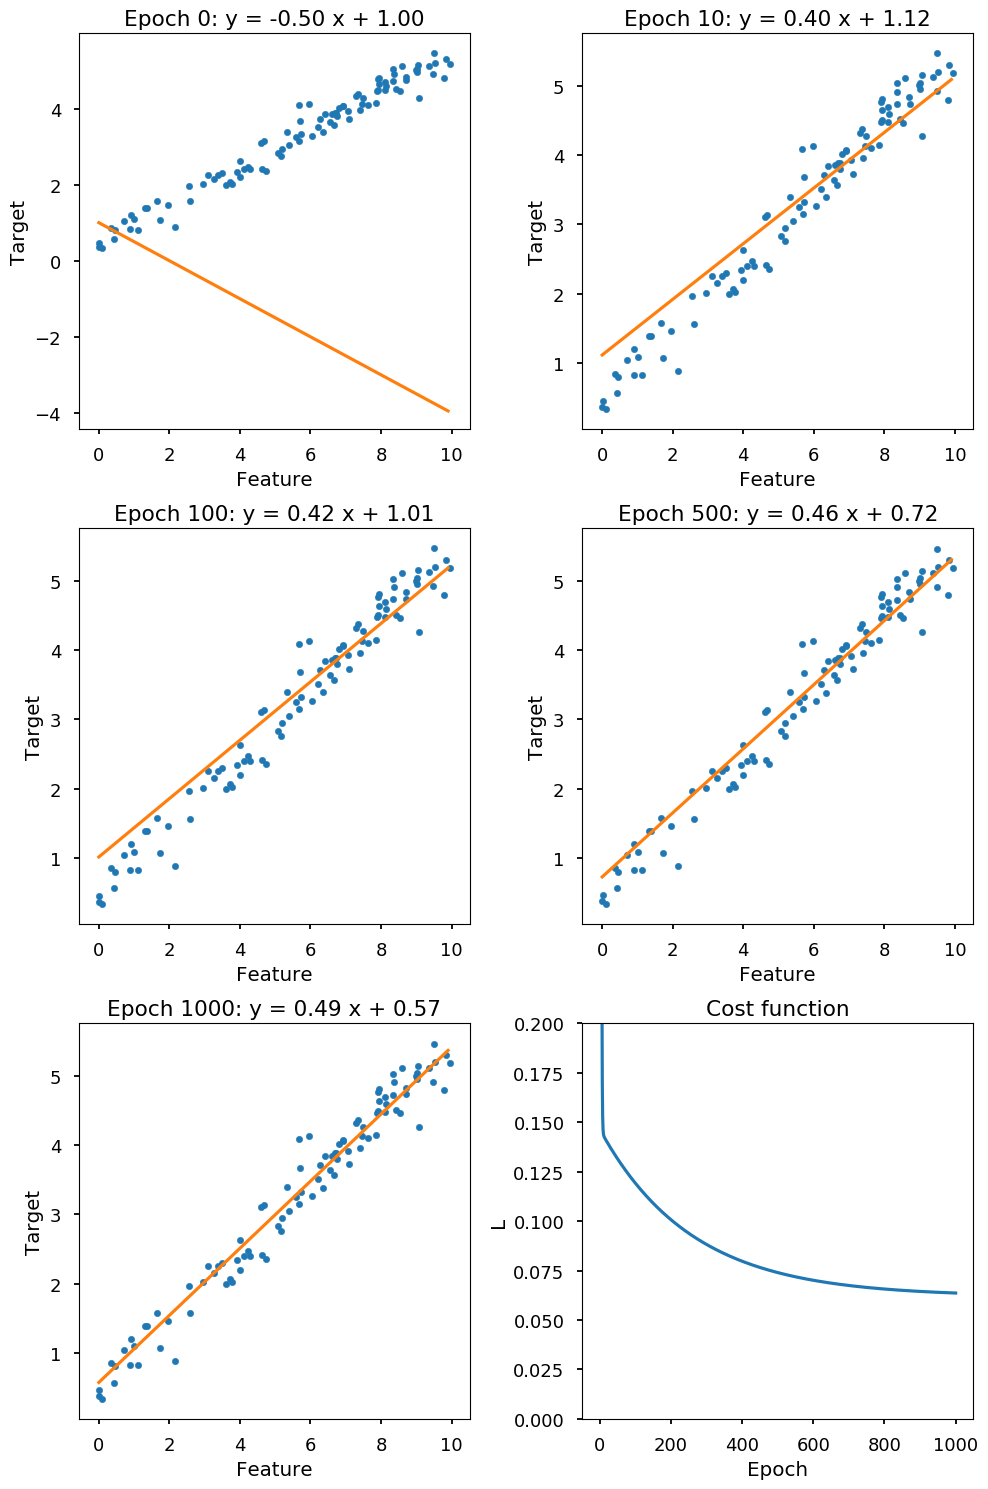

In [0]:
plt.figure(figsize=(10, 15))
n_rows = 3
n_cols = 2

for i, (a_, b_) in enumerate(weights):
  plt.subplot(n_rows, n_cols, i+1)
  
  plt.title('Epoch %i: y = %.2f x + %.2f' % (keep[i], a_, b_))
  plt.xlabel('Feature')
  plt.ylabel('Target')
  
  x_ = np.arange(0, 10, 0.1)

  plt.plot(x_, a_*x_ + b_, color='C1')
  plt.scatter(X, Y, marker='.')
  

plt.subplot(n_rows, n_cols, len(weights) + 1)
plt.title("Cost function")
plt.xlabel("Epoch")
plt.ylabel("L")
plt.ylim([0,0.2])

plt.plot(range(len(costs)), costs)
  
plt.tight_layout();

## Logistic regression

* Logistic regression is used when dependent variable (target) is categorical

* Lets consider dataset $\left\{(\vec x^{(i)}, y^{(i)}); i = 1,\cdots, N\right\}$

* where independent variables $\vec x^{(i)} = (1, x^{(i)}_1,\cdots, x^{(i)}_n)$

* and dependent variables (we start with binary case) $y^{(i)} \in \{0, 1\}$

### Hypothesis

* The dependent variable follows Bernoulli distribution ($1$ with probability $p$, $0$ with probability $1-p$)

* We want to link the independent variable with Bernoulli distribution

* The **logit function** *translates* a linear combination $\vec w \cdot \vec x$ (which can result in any value) into probability distribution: <p align="center"><br>$logit(p) = \ln(odds) = \ln\left(\frac{p}{1-p}\right) = \vec w \cdot \vec x$</p><br>

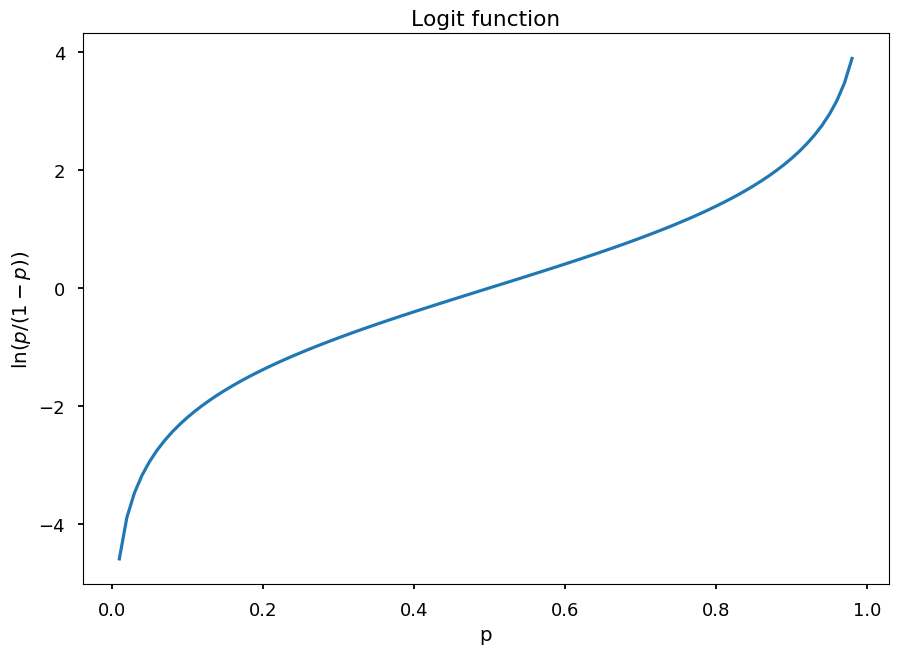

In [0]:
p_ = np.arange(0.01, 0.99, 0.01)

plt.title("Logit function")
plt.xlabel("p")
plt.ylabel("$\ln(p/(1-p))$")

plt.plot(p_, np.log(p_ / (1 - p_)));

* In logistic regression **hypothesis** is defined as the inverse function of logit - **logistic function**: <p align="center"><br>$h(\vec x) = \frac{1}{1 + e^{-\vec w \cdot \vec x}}$</p><br>

* Thus, the probability of $1$ is given by $P(y = 1~|~\vec x, \vec w) = h(\vec x)$

* and the probability of $0$ is given by $P(y = 0~|~\vec x, \vec w) = 1 - h(\vec x)$

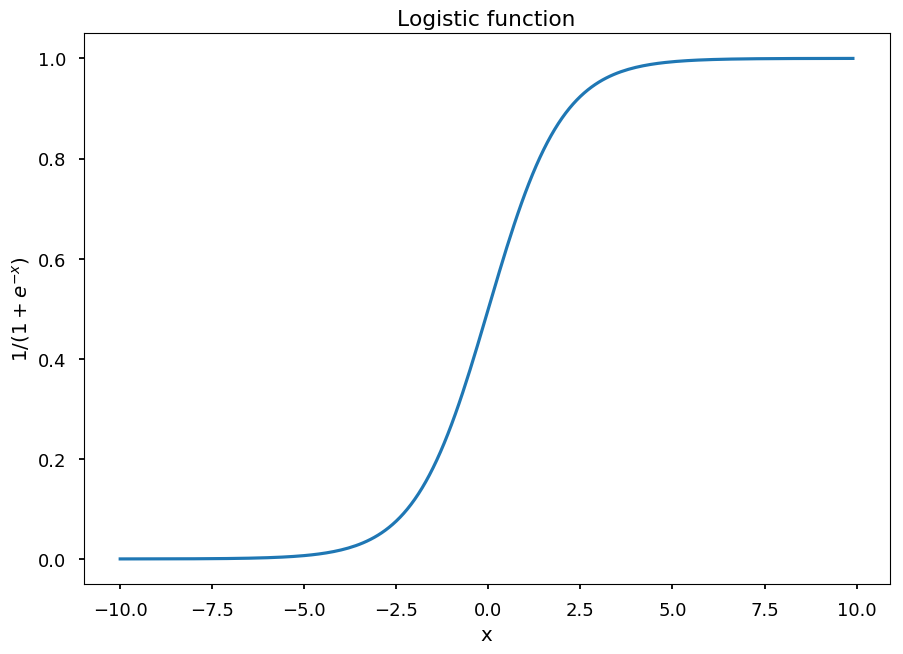

In [0]:
x_ = np.arange(-10, 10, 0.1)

plt.title("Logistic function")
plt.xlabel("x")
plt.ylabel("$1/(1 + e^{-x})$")

plt.plot(x_, 1 / (1 + np.exp(-x_)));

### Cost function

* The probablity mass function (PMS) for $y$ (for given $\vec w$): <p align="center"><br>$p(y~|~\vec x, \vec w) = h(\vec x)^y\cdot \left(1 - h(\vec x)\right)^{1 - y}$</p><br>

* The **likelihood function** is PMS considered as a function of $\vec w$ (for fixed $y$)

* Thus, for a single data point $(\vec x^{(i)}, y^{(i)})$: <p align="center"><br>$l(\vec w) = h(\vec x^{(i)})^{y^{(i)}}\cdot \left(1 - h(\vec x^{(i)})\right)^{1 - y^{(i)}}$</p><br>

* And for the whole dataset: <p align="center"><br>$l(\vec w) = \prod\limits_{i=1}^N h(\vec x^{(i)})^{y^{(i)}}\cdot \left(1 - h(\vec x^{(i)})\right)^{1 - y^{(i)}}$</p><br>

* The goal is to maximize likelihood w.r.t to $\vec w$, which is the same as maximizing **log-likelihood**: <p align="center"><br>$\ln\left(l(\vec w)\right) = \sum\limits_{i=1}^N\left[y^{(i)}\ln\left(h(\vec x^{(i)})\right) + \left(1 - y^{(i)}\right)\ln\left(1 - h(\vec x^{(i)})\right)\right]$</p><br>

* Which is the same as minimizing the cost function $L(\vec w) = -\frac{1}{N}\ln\left(l(\vec w)\right)$

* Once again using gradient descent method we can update weights using: <p align="center"><br>$w_j \rightarrow w_j - \alpha\frac{\partial L(\vec w)}{\partial w_j} = w_j - \frac{\alpha}{N}\sum\limits_{i=1}^{N}\left(y^{(i)} - h(\vec x^{(i)})\right)x^{(i)}_j$</p><br>

#### Quick proof

* First, lets consider the derivative of $h$

<p align="center"><br>$\begin{eqnarray}
\frac{\partial h(\vec x)}{\partial w_j} & = & \frac{\partial}{\partial w_j}\left(1 + e^{-\vec w \cdot \vec x}\right)^{-1} \\
                                        & = & e^{-\vec w \cdot \vec x}\left(1 + e^{-\vec w \cdot \vec x}\right)^{-2}x_j \\
                                        & = & (1 + e^{-\vec w \cdot \vec x} - 1)\left(1 + e^{-\vec w \cdot \vec x}\right)^{-2}x_j \\
                                        & = & \left(1 + e^{-\vec w \cdot \vec x}\right)^{-1}x_j - \left(1 + e^{-\vec w \cdot \vec x}\right)^{-2}x_j\\
                                        & = & h(\vec x)x_j - h^2(\vec x)x_j \\
                                        & = & h(\vec x)\left(1 - h(\vec x)\right)x_j
\end{eqnarray}$</p><br>

* Thus, $\frac{\partial}{\partial w_j}\ln\left(h(\vec x)\right) = \left(1 - h(\vec x)\right)x_j$

* and $\frac{\partial}{\partial w_j}\ln\left(1 - h(\vec x)\right) = -h(\vec x)x_j$

* Finally, we have <p align="center"><br>$\frac{\partial}{\partial w_j}\left[y\ln\left(h(\vec x)\right) + (1 - y)\ln\left(1 - h(\vec x)\right)\right] = \left[y\left(1 - h(\vec x)\right) - (1 - y)h(\vec x)\right]x_j = \left[y - h(\vec x)\right]x_j$</p><br>

### Example

* Lets consider the following dataset

    * $x$ - number of hours spent studying machine learning
    
    * $y$ - student passed (1) or failed (0) the exam

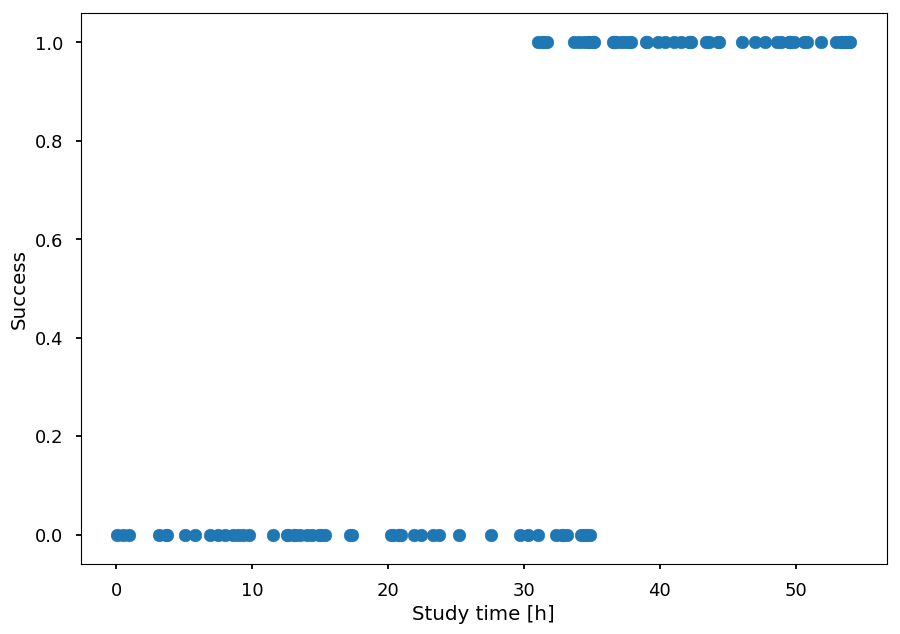

In [0]:
N = 50  # number of students per class

X = np.concatenate((np.random.random((N)) * 35,
                   30 + np.random.random((N)) * 25))

Y = np.concatenate(([0]*N, [1]*N))

plt.xlabel("Study time [h]")
plt.ylabel("Success")

plt.scatter(X, Y);

* Once again lets use `theano`

In [0]:
import theano
import theano.tensor as T

x = T.vector('x') # feature vector
y = T.vector('y') # target vector

a = theano.shared(np.random.randn(), name = 'w') # weights initialized randomly
b = theano.shared(np.random.randn(), name = 'b')

hypo = 1 / (1 + T.exp(-T.dot(x, a) - b))              # hyphothesis
xent = - y * T.log(hypo) - (1 - y) * T.log(1 - hypo)  # cross-entropy loss function
cost = xent.sum()                                     # cost function
grad_a, grad_b = T.grad(cost, [a, b])                 # gradients

alpha = 0.01 # learning rate

# at each training step we update weights:
# w -> w - alpha * grad_w and b -> b - alpha * grad_b
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((a, a - alpha * grad_a),
                                   (b, b - alpha * grad_b)))

* For the training we will scale features to $[0, 1]$, which helps gradient descent to converge faster

In [0]:
x_min = min(X)
x_max = max(X)

s = lambda x: (x - x_min) / (x_max - x_min)  # scale

* Now, we train the model on normalized data

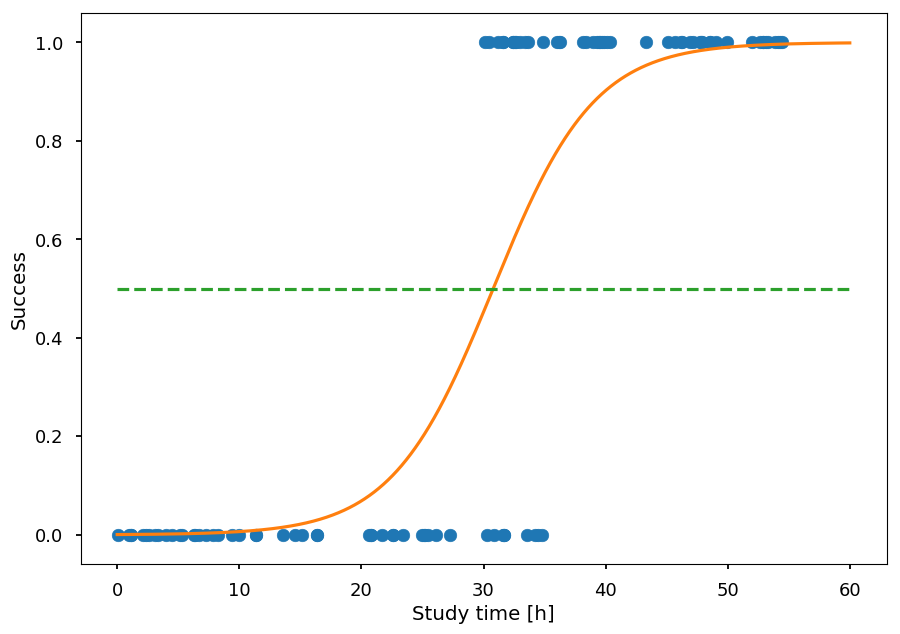

In [0]:
n_epochs = 1000

[train(s(X), Y) for _ in range(n_epochs)]

plt.xlabel("Study time [h]")
plt.ylabel("Success")

plt.scatter(X, Y)

h_ = np.arange(0, 60, 0.01)

plt.plot(h_, 1 / (1 + np.exp(-s(h_)*a.get_value() - b.get_value())), 'C1')

plt.plot([0, 60], [0.5, 0.5], 'C2--');

* The orange line gives the probability of success as a function of study time

* To classify a student one can make a cut at $0.5$

## Multinominal logistic regression

* So far, we considered dependent variable to be binary - it is time to generalize LR to $K$ possible classes

* Lets consider dataset $\left\{(\vec x^{(i)}, y^{(i)}); i = 1,\cdots, N\right\}$

* where independent variables $\vec x^{(i)} = (1, x^{(i)}_1,\cdots, x^{(i)}_n)$

* and dependent variables $y^{(i)} \in \{1, \cdots, K\}$

### Logit approach

* The one way to go is to prepare $K - 1$ binary classifiers w.r.t. to a chosen class as a pivot

* The odds of $y$ being $j \in \left\{1, \cdots, K-1\right\}$ (chosing $K$ as a pivot) is given by: $\frac{P(y = j)}{P(y = K)}$

* which leads to $K-1$ equations with different weights for each possible outcome:

<p align="center"><br>$\begin{eqnarray}
\ln\frac{P(y = 1)}{P(y = K)} = \vec w_1 \cdot \vec x & \Rightarrow & P(y=1) = P(y=K)e^{\vec w_1 \cdot \vec x} \\
\ln\frac{P(y = 2)}{P(y = K)} = \vec w_2 \cdot \vec x & \Rightarrow & P(y=2) = P(y=K)e^{\vec w_2 \cdot \vec x} \\
                                                     & ... & \\
\ln\frac{P(y = K-1)}{P(y = K)} = \vec w_{K-1} \cdot \vec x & \Rightarrow & P(y=K-1) = P(y=K)e^{\vec w_{K-1} \cdot \vec x} \\
\end{eqnarray}$</p><br>

* And as they have to sum to $1$ we get: <p align="center"><br>$P(y=K) = 1 - \sum\limits_{i=1}^{K-1}P(y=K)e^{\vec w_i \cdot \vec x} \Rightarrow P(y = K) = \frac{1}{1 + \sum\limits_{i=1}^{K-1}e^{\vec w_i \cdot \vec x}}$</p><br>

* Thus, the probability of $y = j$, for $j \in \left\{1, \cdots, K-1\right\}$ is given by: <p align="center"><br>$P(y=j) = \frac{e^{\vec w_j \cdot \vec x}}{1 + \sum\limits_{i=1}^{K-1}e^{\vec w_i \cdot \vec x}}$</p><br>

#### Check binary case

* Lets consider binary classification with $0$ being a pivot

* Then we have: <p align="center"><br>$p = P(y=1) = \frac{e^{\vec w \cdot \vec x}}{1 + e^{\vec w \cdot \vec x}} = \frac{1}{1 + e^{-\vec w \cdot \vec x}}$</p><br>

* so the same result as before

### Softmax approach

* An alternative approach (which works for any number of classes) is to consider each class separately with its own parameters set and include the normalization factor ensuring that we get a probability distribution:

<p align="center"><br>$\begin{eqnarray}
\ln P(y = 1) = \vec w_1 \cdot \vec x - \ln Z & \Rightarrow & P(y=1) = \frac{1}{Z}e^{\vec w_1 \cdot \vec x} \\
\ln P(y = 2) = \vec w_2 \cdot \vec x - \ln Z & \Rightarrow & P(y=2) = \frac{1}{Z}e^{\vec w_2 \cdot \vec x} \\
                                                     & ... & \\
\ln P(y = K) = \vec w_K \cdot \vec x - \ln Z & \Rightarrow & P(y=K) = \frac{1}{Z}e^{\vec w_K \cdot \vec x} \\
\end{eqnarray}$</p><br>

* As they have to sum to $1$: <p align="center"><br>$\frac{1}{Z}\sum\limits_{i=1}^Ke^{\vec w_i \cdot \vec x} = 1 \Rightarrow Z = \sum\limits_{i=1}^Ke^{\vec w_i \cdot \vec x}$</p><br>

* Thus, the probability of $y = j$, for $j \in \left\{1, \cdots, K\right\}$ is given by: <p align="center"><br>$P(y=j) = \frac{e^{\vec w_j \cdot \vec x}}{\sum\limits_{i=1}^{K}e^{\vec w_i \cdot \vec x}}$</p><br>

* which is called **softmax function**

#### Check binary case

* For $y \in \left\{0, 1\right\}$ we have:

<p align="center"><br>$\begin{eqnarray}
P(y = 0) & = & \frac{e^{\vec w_0 \cdot \vec x}}{e^{\vec w_0 \cdot \vec x} + e^{\vec w_1 \cdot \vec x}} \\
P(y = 1) & = & \frac{e^{\vec w_1 \cdot \vec x}}{e^{\vec w_0 \cdot \vec x} + e^{\vec w_1 \cdot \vec x}}
\end{eqnarray}$</p><br>

* Please note, that this model is overspecified! $\rightarrow$ $P(y = 0) + P(y = 1) = 1$ (always)

* That means, that once we have one probability the other is given, so we can choose one of $\vec w_i$ arbitrary - lets choose $\vec w_0 = 0$ (and $\vec w_1 \equiv \vec w$): <p align="center"><br>$P(y = 1) = \frac{e^{\vec w \cdot \vec x}}{1 + e^{\vec w\cdot x}} = \frac{1}{1 + e^{-\vec w \cdot x}}$</p><br>

### Cost function

* Lets recall that in our notation we have:

    * dataset: $\left\{(\vec x^{(i)}, y^{(i)}); i = 1,\cdots, N\right\}$

    * features: $\vec x^{(i)} = (1, x^{(i)}_1,\cdots, x^{(i)}_n)$

    * targets: $y^{(i)} \in \{1, \cdots, K\}$
    
* For every possible outcome we have a corresponding vector of weights $\vec w_j$ (for $j = 1, \cdots, K$) - so in fact we have a matrix of parameters ($W$)

* The hypothesis is given by a vector: <p align="center"><br>$h(\vec x) = \left[\begin{array}{c}\frac{e^{\vec w_1 \cdot \vec x}}{\sum\limits_{i=1}^{K}e^{\vec w_i \cdot \vec x}} \\ \frac{e^{\vec w_2 \cdot \vec x}}{\sum\limits_{i=1}^{K}e^{\vec w_i \cdot \vec x}} \\ ... \\ \frac{e^{\vec w_K \cdot \vec x}}{\sum\limits_{i=1}^{K}e^{\vec w_i \cdot \vec x}}\end{array}\right]$</p><br>

* The prediction for unseen sample is done using `argmax` function

* As before we define the cost function as the negative log-likelihood: <p align="center"><br>$L(W) = -\frac{1}{N}\sum\limits_{i=1}^N\ln\left[\frac{e^{\vec w_{y^{(i)}} \cdot \vec x^{(i)}}}{\sum\limits_{j=1}^{K}e^{\vec w_j \cdot \vec x^{(i)}}}\right] = -\frac{1}{N}\sum\limits_{i=1}^N\left[\vec w_{y^{(i)}} \cdot \vec x^{(i)} - \ln\sum\limits_{j=1}^{K}e^{\vec w_j \cdot \vec x^{(i)}}\right]$</p><br>

#### Gradient

* We need to calculate the partial derivative for each parameter $w_{ab}$ 

    * $a = 1, \cdots, K$ (possible outcome $y$)
    
    * $b = 0, \cdots, n$ ($\vec x$ coordinate)
    
* For the first term we have: <p align="center"><br>$\frac{\partial}{\partial w_{ab}} \vec w_{y^{(i)}} \cdot \vec x^{(i)} = [y^{(i)} = a]x^{(i)}_b$</p><br>

* For the second term we have:

<p align="center"><br>$\begin{eqnarray}
\frac{\partial}{\partial w_{ab}} \ln\sum\limits_{j=1}^{K}e^{\vec w_j \cdot \vec x^{(i)}} & = & \frac{\sum\limits_{j=1}^{K}e^{\vec w_j \cdot \vec x^{(i)}} \cdot [y^{(i)} = a] \cdot x^{(i)}_b}{\sum\limits_{j=1}^{K}e^{\vec w_j \cdot \vec x^{(i)}}} \\ & = & \sum\limits_{j=1}^{K}\left[\frac{e^{\vec w_j \cdot \vec x^{(i)}}}{\sum\limits_{j=1}^{K}e^{\vec w_j \cdot \vec x^{(i)}}}\cdot [y^{(i)} = a] \cdot x^{(i)}_b\right]\\ & = & \sum\limits_{j=1}^{K}\left[P(y = j~|~\vec x^{(i)})\cdot [y^{(i)} = a] \cdot x^{(i)}_b\right] \\ & = & P(y=a~|~\vec x^{(i)})x^{(i)}_b
\end{eqnarray}$</p><br>

* Finally, the gradient of the cost function is given by: <p align="center"><br>$\frac{\partial L(W)}{\partial w_{ab}} = -\frac{1}{N}\sum\limits_{i=1}^N\left[[y^{(i)}=a]x^{(i)}_b - P(y=a~|~\vec x^{(i)})x^{(i)}_b\right]$</p><br>

* And for every iteration of the gradient descent method weights are updated according to: <p align="center"><br>$w_{ab} \rightarrow w_{ab} - \alpha\frac{\partial L(W)}{\partial w_{ab}}$</p><br>

### Example

* Let a student have two features:

    * initial knowledge: $x_1 \in [0, 100]$
    
    * hours spent studying: $x_2 \in [0, 50]$
    
* And, based on these two features, a grade can be assigned to a student:

    * target: $y \in \left\{2, 3, 4, 5\right\}$

#### Dataset

In [0]:
def grade(init_know, study_time):
  """Arbitrary grading system."""
  score = np.random.normal(init_know + 2*study_time, 5)
  
  if score > 90: return 3    # bdb
  elif score > 70: return 2  # db
  elif score > 50: return 1  # dst
  else: return 0             # ndst

* The training set

In [0]:
N = 1000  # number of students

X = np.random.sample((N, 2)) * [100, 50]
Y = np.array([grade(*student) for student in X], dtype='int32')

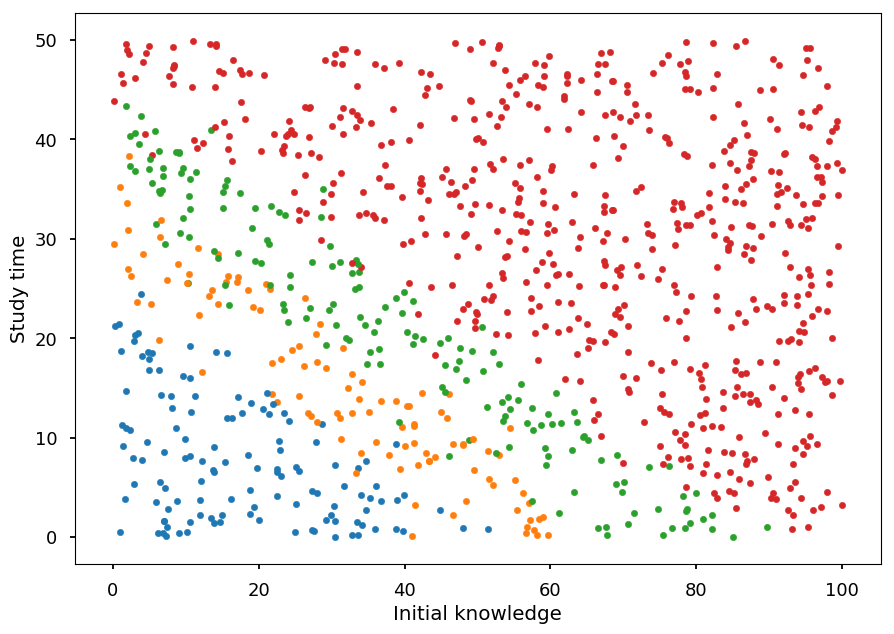

In [405]:
plt.xlabel("Initial knowledge")
plt.ylabel("Study time")

for student, g in zip(X, Y):
  plt.scatter(*student, color='C'+str(g), marker='.')

#### Data preparation

* For the training process we scale features to $[0, 1]$ - otherwise *initial knowledge* would weight more!

In [0]:
X_train = np.multiply(X, np.array([1/100, 1/50]))

* Lets add 1 for bias term to the dataset

In [0]:
X_train = np.hstack((np.ones((N, 1)), X_train))

* How does it look?

In [408]:
print("Original:", X[:5], "Preprocessed:", X_train[:5], sep="\n\n")

Original:

[[ 7.47319311 25.86221876]
 [21.66198394 33.34522121]
 [69.87399886  4.53759853]
 [75.83844581 22.05176574]
 [17.38539272 47.02800299]]

Preprocessed:

[[1.         0.07473193 0.51724438]
 [1.         0.21661984 0.66690442]
 [1.         0.69873999 0.09075197]
 [1.         0.75838446 0.44103531]
 [1.         0.17385393 0.94056006]]


#### Training

* The implementation of MLR in `theano`

In [0]:
import theano
import theano.tensor as T

x = T.matrix('x')  # feature vectors
y = T.ivector('y') # target vector

W = theano.shared(np.random.randn(3, 4))  # weight matrix (2 features + bias,
                                          #                4 possible outcomes)
  
hypo = T.nnet.softmax(T.dot(x,W))                     # hyphothesis
cost = -T.mean(T.log(hypo)[T.arange(y.shape[0]), y])  # cost function
grad_W = T.grad(cost=cost, wrt=W)                     # gradients

alpha = 0.5 # learning rate

# define a training step
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = [(W, W - alpha * grad_W)]
                       )

# predict a class label
predict = theano.function(inputs=[x], outputs=T.argmax(hypo, axis=1))

* The training process on normalized data

In [0]:
n_epochs = 10000
acc_train = []  # accuracy on training dataset

for _ in range(n_epochs):
  # do a single step of gradient descent
  train(X_train, Y)
  # calculate accuracy with current set of weights
  acc_train.append((Y == predict(X_train)).sum() / Y.shape[0])

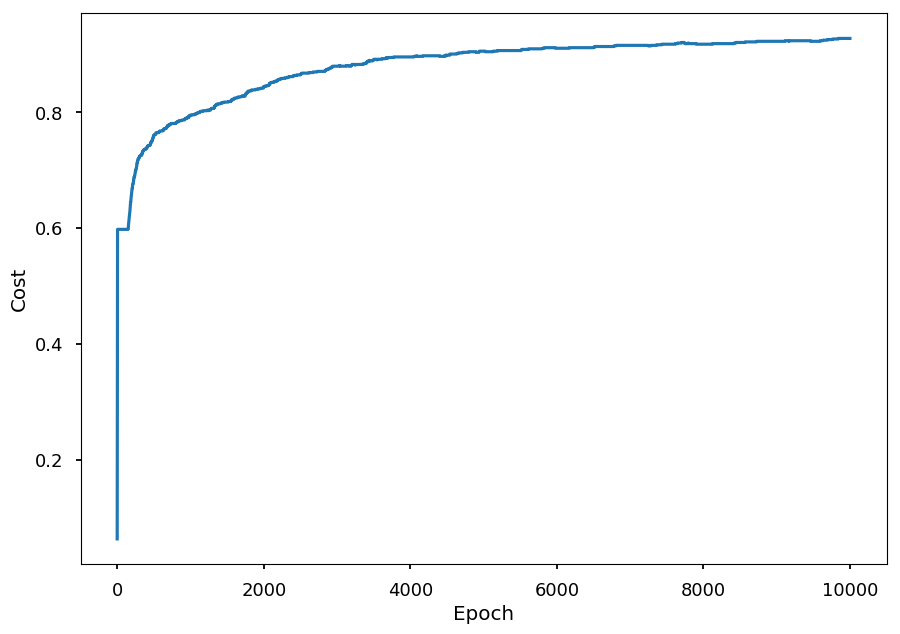

In [413]:
plt.xlabel("Epoch")
plt.ylabel("Cost")

plt.plot(range(len(acc_train)), acc_train);


#### Validation

* First we need **unseen** data for testing

In [0]:
# another set of students
X_test = np.random.sample((N, 2)) * [100, 50]
Y_test = np.array([grade(*student) for student in X_test], dtype='int32')

# normalize and add bias 
X_test_normalized = np.multiply(X_test, np.array([1/100, 1/50]))
X_test_normalized = np.hstack((np.ones((N, 1)), X_test_normalized))

* To predict a grade we use the function `predict` defined earlier

In [0]:
Y_pred = predict(X_test_normalized)

* We can visualize the prediction

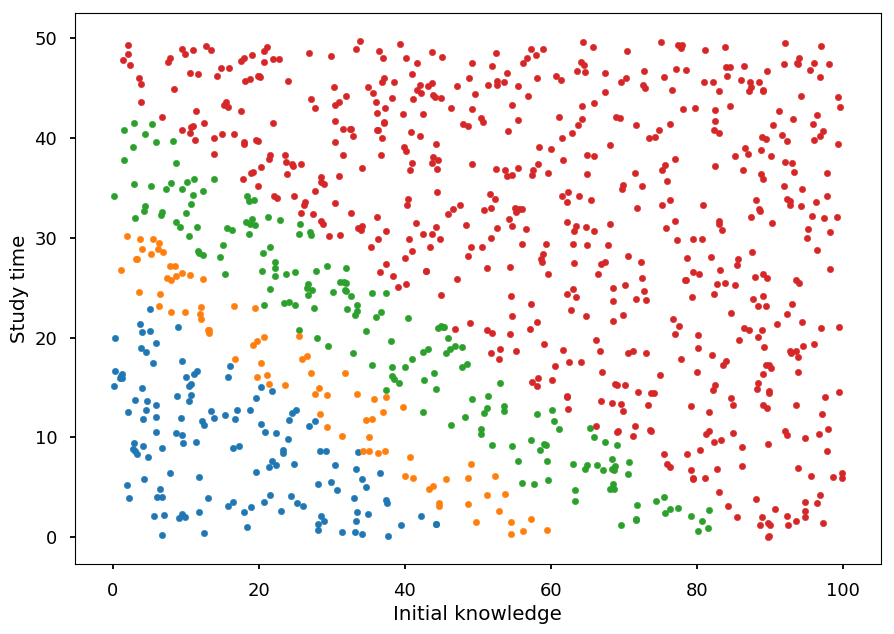

In [416]:
plt.xlabel("Initial knowledge")
plt.ylabel("Study time")

for student, g in zip(X_test, Y_pred):
  plt.scatter(*student, color='C'+str(g), marker='.')

* and calculate the accuracy

In [417]:
(Y_test == Y_pred).sum() / Y_test.shape[0]

0.906

#### Softmax visualization

* Lets visualize what the model has just learned

* First we need an easy way to calculate softmax output for a student

In [0]:
softmax = theano.function(inputs=[x], outputs=hypo)

* Now, we can use it on the validation dataset

In [0]:
probs = softmax(X_test_normalized)

* For every sample softmax returns an array of the probabilities of belonging to each class

In [458]:
print(probs.shape)

(1000, 4)


* We can plot each class separately

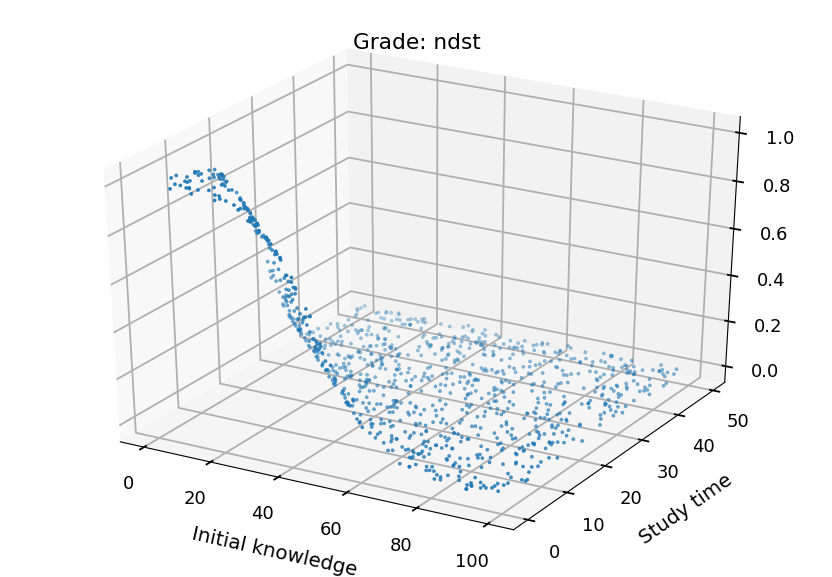

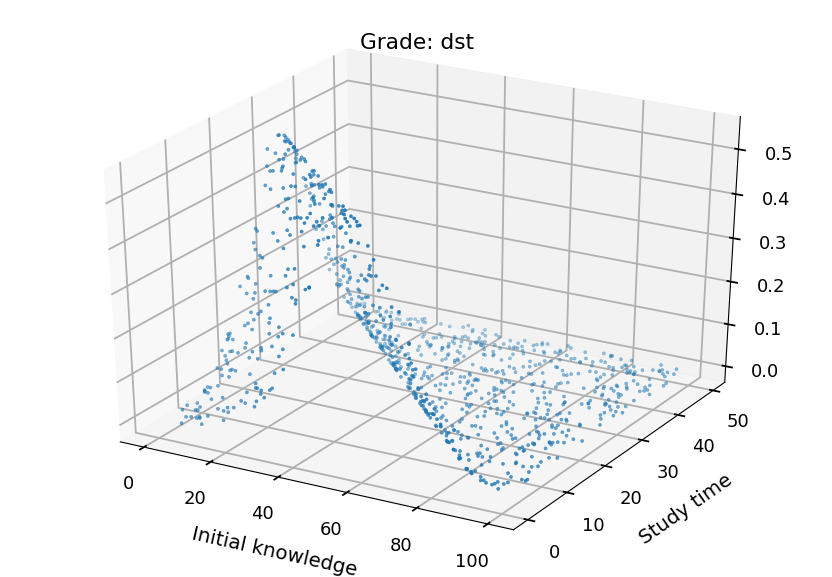

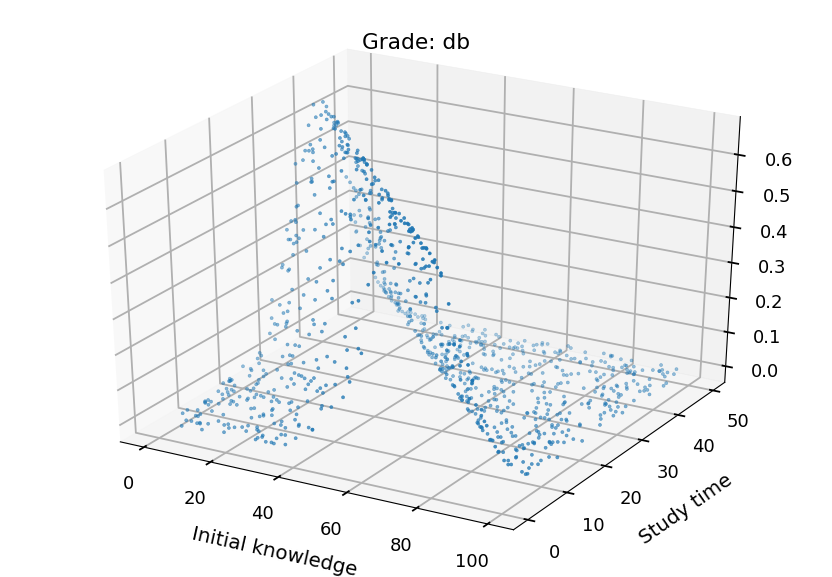

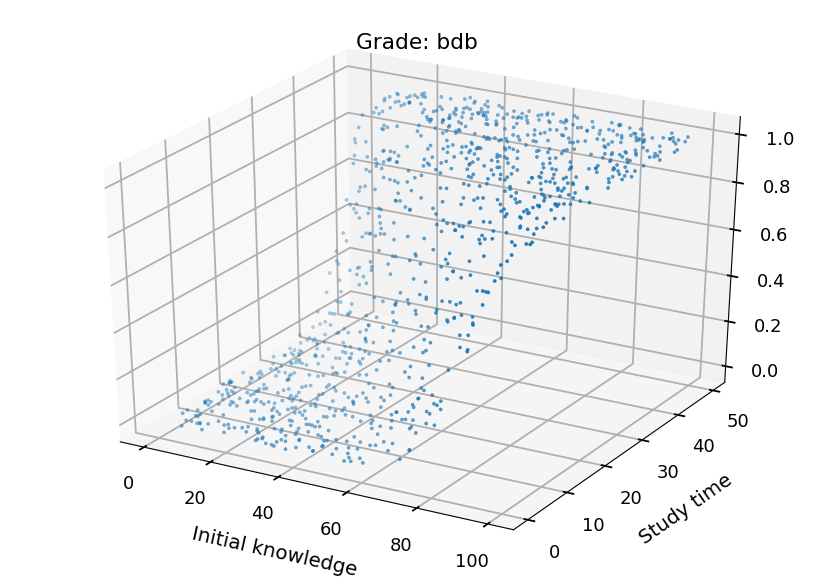

In [466]:
from mpl_toolkits.mplot3d import Axes3D

grades = ("ndst", "dst", "db", "bdb")

for i in range(4):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.set_xlabel("Initial knowledge",  labelpad=20)
  ax.set_ylabel("Study time",  labelpad=20)
  
  ax.set_title("Grade: " + grades[i])
  
  ax.scatter(X_test.T[0], X_test.T[1], probs.T[i], marker='.')

## Neural Networks

* Here are some helpful functions to draw neural networks

* Lets just skip them - it is just bunch of matplotlib

In [0]:
# the functions below grabbed from http://www.astroml.org/book_figures/appendix/fig_neural_network.html

radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')

def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fill=False, lw=2)
    ax.add_patch(circ)

In [0]:
# based on borrowed function we can create a new one to draw NN

def draw_net(input_size, output_size, hidden_layers=[], w=6, h=4):
  """Draw a network"""
  x = 0  # initial layer position
  
  ax = plt.subplot()
  ax.set_aspect('equal')
  ax.axis('off')

  ax.set_xlim([-2, -2 + w])
  ax.set_ylim([-h / 2 , h / 2 + 1])
  
  # set y position  
  y_input = np.arange(-(input_size - 1) / 2, (input_size + 1) / 2, 1)
  y_output = np.arange(-(output_size - 1) / 2, (output_size + 1) / 2, 1)
  y_hidden = [np.arange(-(n - 1) / 2, (n + 1) / 2, 1) for n in hidden_layers]
  
  # draw input layer
  plt.text(x, h / 2 + 0.5, "Input\nLayer", ha='center', va='top', fontsize=16)
  
  for i, y in enumerate(y_input):
    draw_circle(ax, (x, y), radius)
    ax.text(x - 0.9, y, '$x_%i$' % (input_size - 1 - i),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x - 0.9, y), 0.1, (x, y), radius)
  
  last_layer = y_input  # last layer y positions
  
  # draw hidden layers
  for ys in y_hidden:
    # shift x
    x += 2
    plt.text(x, h / 2 + 0.5, "Hidden\nLayer", ha='center', va='top', fontsize=16)
    
    # draw neurons for each hidden layer
    for i, y1 in enumerate(ys):
      draw_circle(ax, (x, y1), radius)
      
      # connect a neuron with all neurons from previous layer
      if i != len(ys) - 1: # skip bias
        for y2 in last_layer:
          draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)
        
    # update last layer
    last_layer = ys
  
  x += 2  # update position for output layer
    
  # draw output layer
  plt.text(x, h / 2 + 0.5, "Output\nLayer", ha='center', va='top', fontsize=16)

  for i, y1 in enumerate(y_output):
    draw_circle(ax, (x, y1), radius)
    ax.text(x + 0.8, y1, 'Output', ha='left', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x, y1), radius, (x + 0.8, y1), 0.1)

    # connect each output neuron with all neurons from previous layer
    for y2 in last_layer:
      draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

### Neuron

* As mentioned at the beginning, we are going to discuss feedforward neural networks

* Lets start with a single neuron

* What we were doing so far

    * We had some training samples with $N$ features
    
    * We assumed linear model
    
    * We connected features with outcomes using linear, logistic or softmax function
    
* Thus, we considered somthing like this:

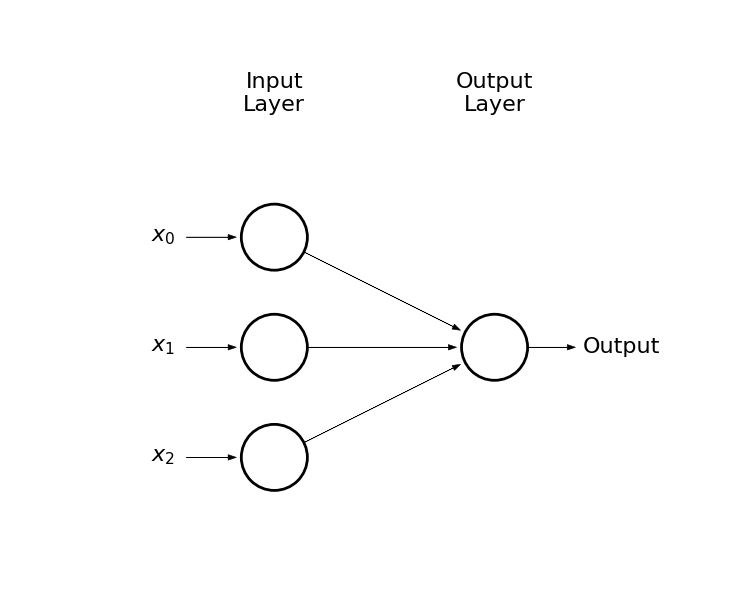

In [170]:
draw_net(3, 1)

* *Output circle* represents a neuron

* Arrows represent connections (weights)

* A neuron is defined by an activation function, e.g.:

    * binary step
    
    * logistic function
    
    * hyperbolic tangent
    
    * rectified linear unit (ReLU)

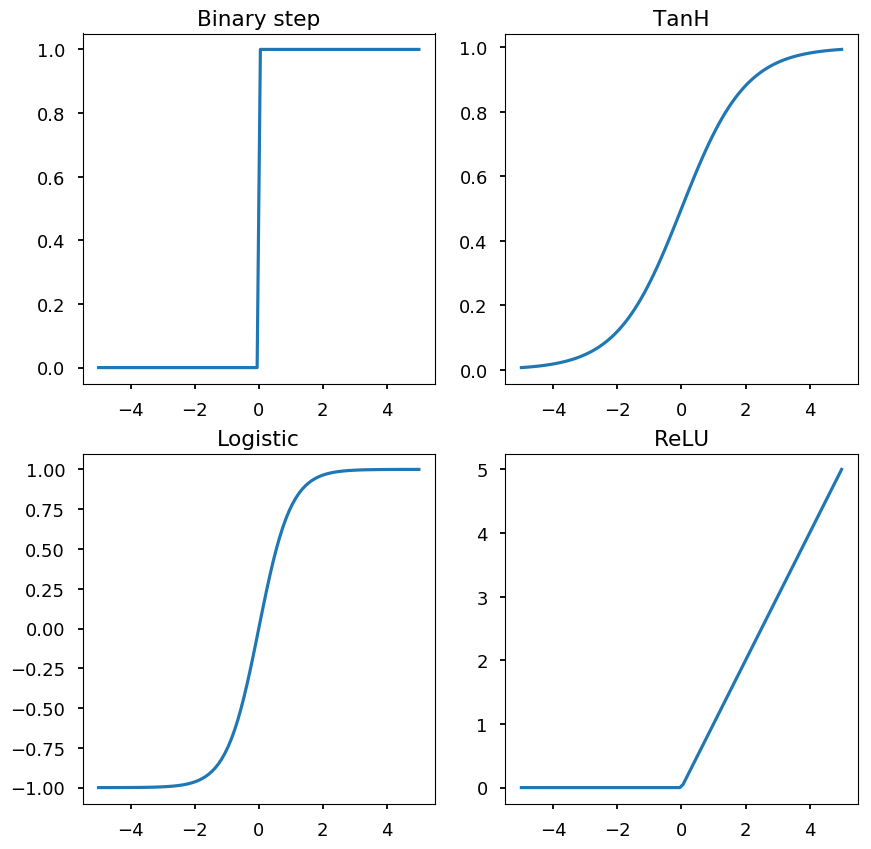

In [146]:
import math

def binary_step(x): return 0 if x < 0 else 1

def logistic(x): return 1 / (1 + math.exp(-x))

def tanh(x): return math.tanh(x)

def relu(x): return 0 if x < 0 else x

x = np.linspace(-5, 5, 100)

bs = [binary_step(x_) for x_ in x]
lf = [logistic(x_) for x_ in x]
th = [tanh(x_) for x_ in x]
re = [relu(x_) for x_ in x]

_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.set_title("Binary step")
ax2.set_title("TanH")
ax3.set_title("Logistic")
ax4.set_title("ReLU")

ax1.plot(x, bs)
ax2.plot(x, lf)
ax3.plot(x, th)
ax4.plot(x, re);

### Neural networks

* Imagine that the output of a neuron is an input for another neuron

* This way we can create another layer of neurons (hidden layer) which would be an input for the output layer

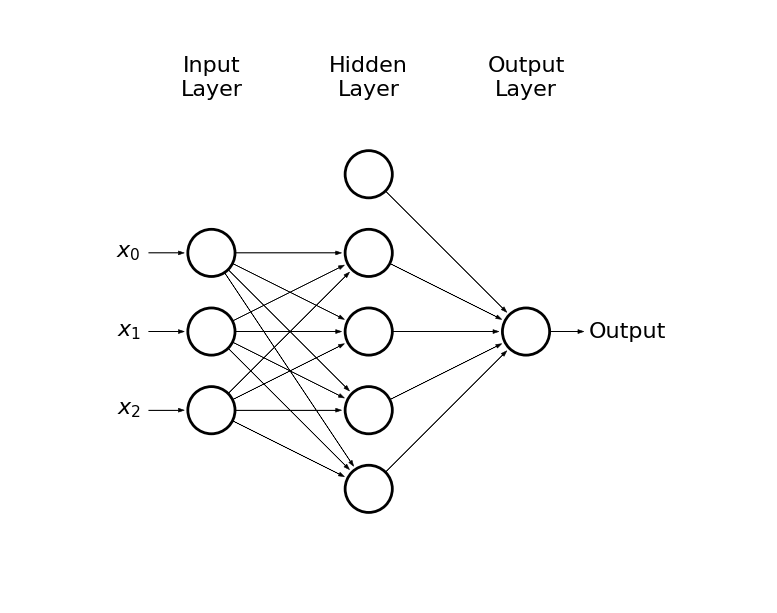

In [171]:
draw_net(3, 1, [5], w=9, h=6)

* Or we could get carried away

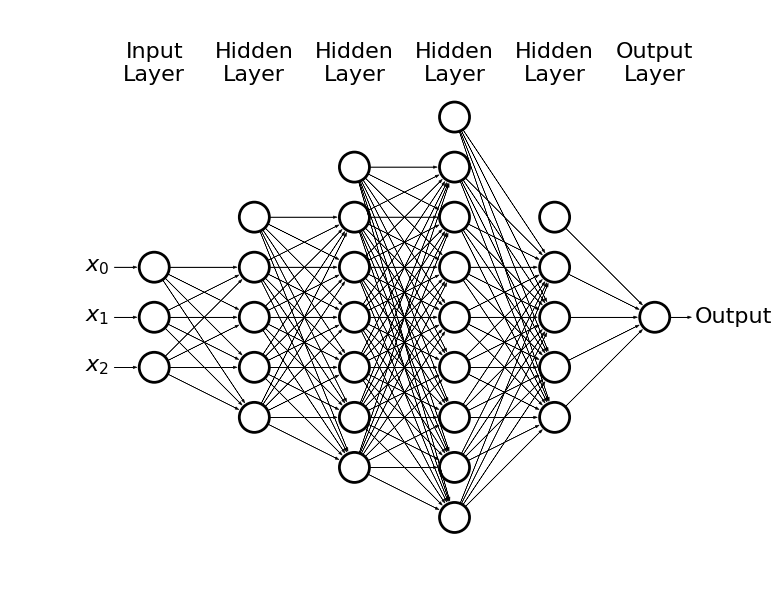

In [172]:
draw_net(3, 1, [5, 7, 9, 5], w=14, h=10)

* This way we can solve non-linear problems

* In general, the more the problem is complex the more neurons we need

* The numbers of hidden layers and hidden neurons are **hyperparameters** of the model

    * If the NN is too small - underfitting
    
    * It the NN is too large - overfitting

* Plase note, that we may have also many possible outcomes through e.g. softmax

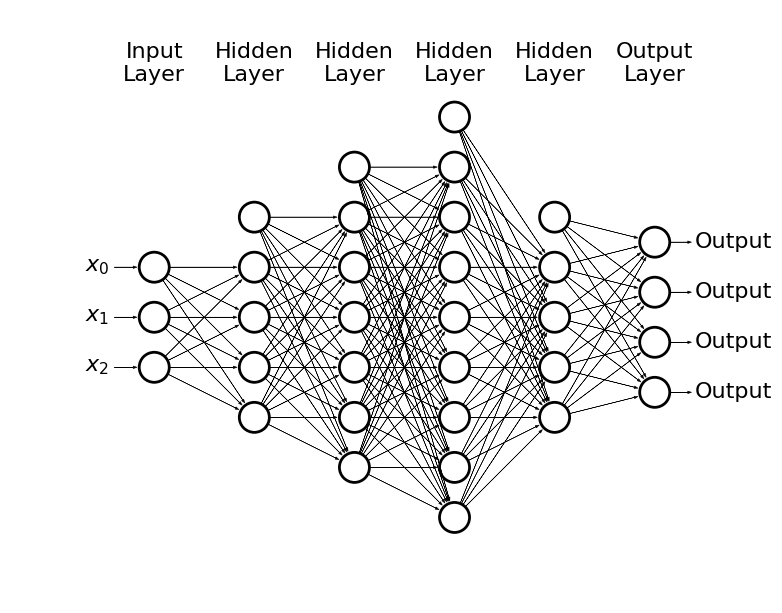

In [173]:
draw_net(3, 4, [5, 7, 9, 5], w=14, h=10)

* How to train this monster?

### Backpropagation

* We can use the gradient descent method, but now we need to propagate the error through all layers:

    * Input -> forward propagation -> error
    
    * Backpropagate the error -> update weights

* Lets see how it works on a simple example

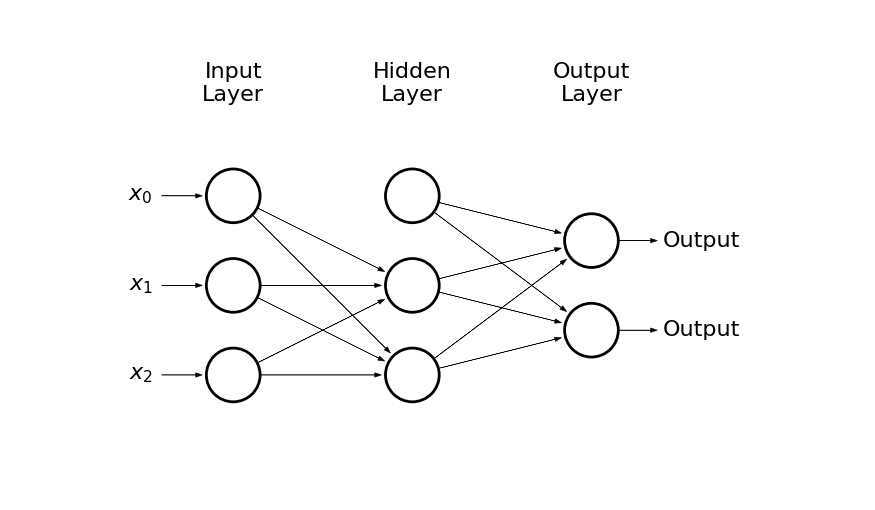

In [175]:
draw_net(3, 2, [3], w=9, h=4)

* The input is given by: $x_0 = 1$, $x_1$, $x_2$

* There are 2 hidden neurons + bias: $h_0 = 1$, $h_1$, $h_2$

* And two possible outcomes: $o_1$, $o_2$

* The input layer is connected with the hidden layer by weights: $w^{(1)}_{ij}$, where $i = 0, 1, 2$ and $j = 1, 2$, e.g.

    * $w^{(1)}_{12}$ is the weight connecting $x_1$ and $h_2$
    
* The hidden layer is connected with the output layer by weights: $w^{(2)}_{ij}$

* The input for a neuron $h_k$ is given by: <p align="center"><br>$h_{k, in} = w^{(1)}_{0k} + w^{(1)}_{1k} \cdot x_1 + w^{(1)}_{2k} \cdot x_2$</p><br>

* And the output: <p align="center"><br>$h_{k, out} = \left(1 + \exp(-h_{k, in})\right)^{-1}$</p><br>

* The input for the outcome $o_k$ is given by: <p align="center"><br>$o_{k, in} = w^{(2)}_{0k} + w^{(2)}_{1k} \cdot h_{1, out} + w^{(2)}_{2k} \cdot h_{2, out}$</p><br>

* And the output: <p align="center"><br>$o_{k, out} = \left(1 + \exp(-o_{k, in})\right)^{-1}$</p><br>

* Lets define the cost function: <p align="center"><br>$L(w) = \frac{1}{2}\left(o_{1, true} - o_{1, out}\right)^2 + \frac{1}{2}\left(o_{2, true} - o_{2, out}\right)^2$</p><br>

* To update weights using the gradient descent method we need to calculate $\partial L(w) / \partial w^{(a)}_{ij}$

* As an example, let consider updating $w^{(2)}_{11}$: <p align="center"><br>$\frac{\partial L(w)}{\partial w^{(2)}_{11}} = \frac{\partial L(w)}{\partial o_{1, out}}\cdot\frac{\partial o_{1, out}}{\partial o_{1, in}}\cdot\frac{\partial o_{1, in}}{\partial w^{(2)}_{11}}$</p><br>

## AND, OR vs XOR

* I will assume that basic logic gates do not need introduction

* The point here is that AND and OR are linearly separable, and XOR is not

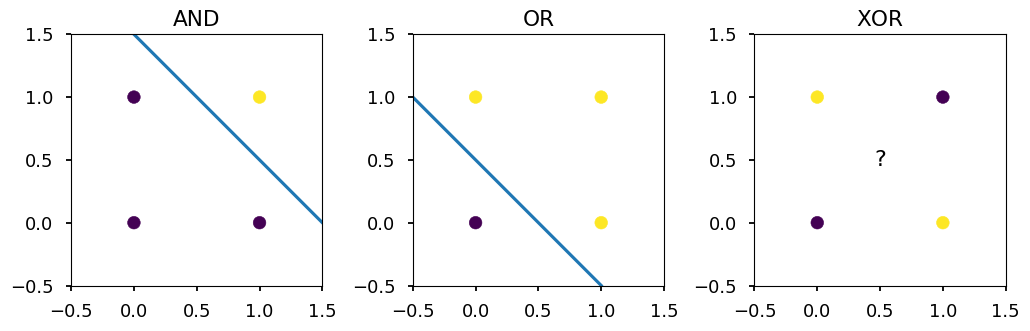

In [184]:
X = [[0,0], [0,1], [1,0], [1,1]]
Y_and = [0, 0, 0, 1]
Y_or = [0, 1, 1, 1]
Y_xor = [0, 1, 1, 0]

titles = ("AND", "OR", "XOR")

for i, Y in enumerate([Y_and, Y_or, Y_xor]):
  ax = plt.subplot(131 + i)
  
  ax.set_xlim([-0.5, 1.5])
  ax.set_ylim([-0.5, 1.5])
  
  ax.set_aspect('equal')
  
  plt.title(titles[i])
  plt.scatter(*zip(*X), c=Y)
  
  if i == 0:
    plt.plot([0, 1.5], [1.5, 0])
  elif i == 1:
    plt.plot([-0.5, 1], [1, -0.5])
  else:
    plt.text(0.5, 0.5, s="?", fontsize=16, ha='center', va='center')
  
plt.tight_layout()

### Single neuron approach

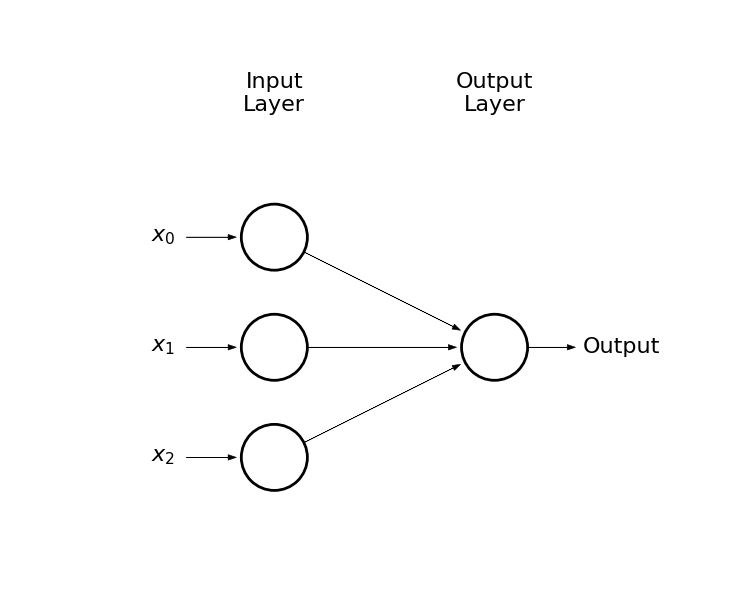

In [53]:
draw_net(3, 1)

* Let logistic function be our hypothesis: <p align="center"><br>$h(x_1, x_2) = \left(1 + \exp(-w_0 - w_1 \cdot x_1 - w_2 \cdot x_2)\right)^{-1}$</p><br>

* For AND gate we want $h(0, 0) = h(0, 1) = h(1, 0) = 0$ and $h(1, 1) = 1$

* The example is so simple, that we could guess weights:

    * $w_0 << 0$
    
    * $w_0 + w_1 << 0$
    
    * $w_0 + w_2 << 0$
    
    * $w_0 + w_1 + w_2 >> 0$
    
* But lets build a neuron

In [0]:
import theano
import theano.tensor as T

x = T.matrix('x') # feature vector
y = T.vector('y') # target vector

w = theano.shared(np.random.randn(2), name = 'w') # weights initialized randomly
b = theano.shared(np.random.randn(), name = 'b')  # bias term

hypo = 1 / (1 + T.exp(-T.dot(x, w) - b))              # hyphothesis
xent = - y * T.log(hypo) - (1 - y) * T.log(1 - hypo)  # cross-entropy loss function
cost = xent.sum()                                     # cost function
grad_w, grad_b = T.grad(cost, [w, b])                 # gradients

alpha = 0.1 # learning rate

# at each training step we update weights:
# w -> w - alpha * grad_w and b -> b - alpha * grad_b
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w, w - alpha * grad_w),
                                   (b, b - alpha * grad_b)))

predict = theano.function(inputs=[x], outputs=hypo)

* Train for all gates and save prediction

In [0]:
N = 1000

gates = ("AND", "OR", "XOR")
gates_pred = {}

for gate, data in zip(gates, (Y_and, Y_or, Y_xor)):
  # reset weights
  w.set_value(np.random.randn(2))
  b.set_value(np.random.randn())

  # train neuron
  [train(X, data) for _ in range(N)]
  gates_pred[gate] = predict(X)

* Lets see the result

In [82]:
for gate in gates:
  for i, (x1, x2) in enumerate(X):
    print("{} {} {} -> {}".format(x1, gate, x2, gates_pred[gate][i]))
  print()

0 AND 0 -> 0.00018774340087294284
0 AND 1 -> 0.04835388458963121
1 AND 0 -> 0.04834664667043076
1 AND 1 -> 0.9321880416392287

0 OR 0 -> 0.05096342740264947
0 OR 1 -> 0.9795405137359009
1 OR 0 -> 0.9798688809365104
1 OR 1 -> 0.9999769570570585

0 XOR 0 -> 0.49999999640124027
0 XOR 1 -> 0.49999999943423534
1 XOR 0 -> 0.4999999994362604
1 XOR 1 -> 0.5000000024692554



* As one could / should expect a linear classifier can not work for non-linear problems (like XOR gate)

### Neural network approach

* Please note, that XOR is not linear, but it can be expressed in terms or linear problems combination

```
x XOR y = (x AND NOT y) OR (y AND NOT x)
```

* Lets consider NN with two hidden neurons

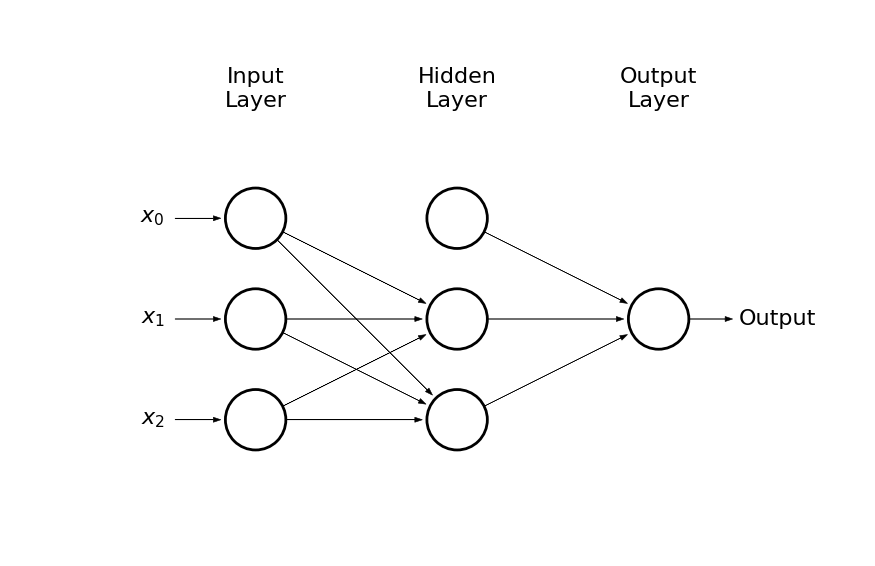

In [86]:
draw_net(3, 1, [3], w=8)

* Lets use `theano` last time to build the network

In [0]:
import theano
import theano.tensor as T

x = T.matrix('x') # feature vector
y = T.vector('y') # target vector

# first layer's weights (including bias)
w1 = theano.shared(np.random.randn(3,2), name = 'w1')
# second layer's weights (including bias)
w2 = theano.shared(np.random.randn(3), name = 'w2')

h = T.nnet.sigmoid(T.dot(x, w1[:2,]) + w1[2,])  # hidden layer
o = T.nnet.sigmoid(T.dot(h, w2[:2,]) + w2[2,])  # output layer

xent = - y * T.log(o) - (1 - y) * T.log(1 - o)  # cross-entropy loss function
cost = xent.sum()                               # cost function
grad_w1, grad_w2 = T.grad(cost, [w1, w2])       # gradients

alpha = 0.1 # learning rate

# at each training step we update weights:
# w -> w - alpha * grad_w and b -> b - alpha * grad_b
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w1, w1 - alpha * grad_w1),
                                   (w2, w2 - alpha * grad_w2)))

predict = theano.function(inputs=[x], outputs=o)

* Train on XOR and print prediction

In [162]:
[train(X, Y_xor) for _ in range(10000)]
prediction = predict(X)

for i, (x1, x2) in enumerate(X):
  print("{} XOR {} -> {}".format(x1, x2, prediction[i]))

0 XOR 0 -> 0.005114740815278212
0 XOR 1 -> 0.9932581408757912
1 XOR 0 -> 0.9931902289336407
1 XOR 1 -> 0.004574250556087016


### Again the same, but with tensorflow

* Lets try to solve XOR gate using `tensorflow`

* In comments there is `theano` code

In [0]:
import tensorflow as tf

# x = T.matrix('x') # feature vector
# y = T.vector('y') # target vector
x = tf.placeholder(tf.float32, [4, 2])
y = tf.placeholder(tf.float32, [4, 1])

# w1 = theano.shared(np.random.randn(3,2), name = 'w1')
# w2 = theano.shared(np.random.randn(3), name = 'w2')
w1 = tf.Variable(tf.random_normal([3, 2]), name='w1')
w2 = tf.Variable(tf.random_normal([3, 1]), name='w2')

# h = T.nnet.sigmoid(T.dot(x, w1[:2,]) + w1[2,])
# o = T.nnet.sigmoid(T.dot(h, w2[:2,]) + w2[2,])
h = tf.sigmoid(tf.add(tf.matmul(x, w1[:2,]), w1[2,]))
o = tf.sigmoid(tf.add(tf.matmul(h, w2[:2,]), w2[2,]))

#xent = - y * tf.log(o) - (1 - y) * tf.log(1 - o)
xent = tf.losses.log_loss(y, o)
cost = tf.reduce_mean(xent)

opt = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

init = tf.global_variables_initializer()

In [186]:
X = [[0,0], [1,0], [0,1], [1,1]]
Y_xor = [[0], [1], [1], [0]]

with tf.Session() as sess:
  sess.run(init)

  [sess.run(opt, feed_dict={x: X, y: Y_xor}) for _ in range(10000)]
    
  print(sess.run(o, feed_dict={x: X}))

[[0.01071231]
 [0.98791456]
 [0.98790956]
 [0.01878399]]


## Simple regression with NN

* Lets consider a dataset generated from *noised* sinus distribution

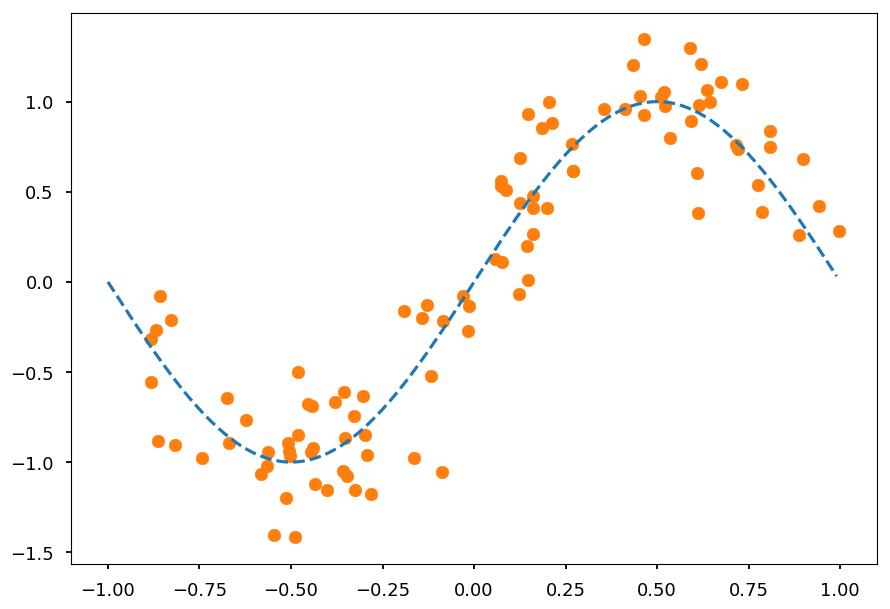

In [37]:
from math import sin, cos, pi, exp

def get_dataset(N=20, sigma=0.1):
  """Generate N training samples"""
  # X is a set of random points from [-1, 1]
  X = 2 * np.random.sample(N) - 1
  # Y are corresponding target values (with noise included)
  Y = np.array([sin(pi*x) + np.random.normal(0, sigma) for x in X])

  return X, Y

# plot a sample
X, Y = get_dataset(100, 0.25)

x_ = np.arange(-1, 1, 0.01)

plt.scatter(X, Y, color='C1')
plt.plot(x_, np.sin(np.pi * x_), 'C0--');

* We represent hidden neurons via logistic function (3 should be enough)

* The output is just a sum of three hidden neurons outputs and bias term

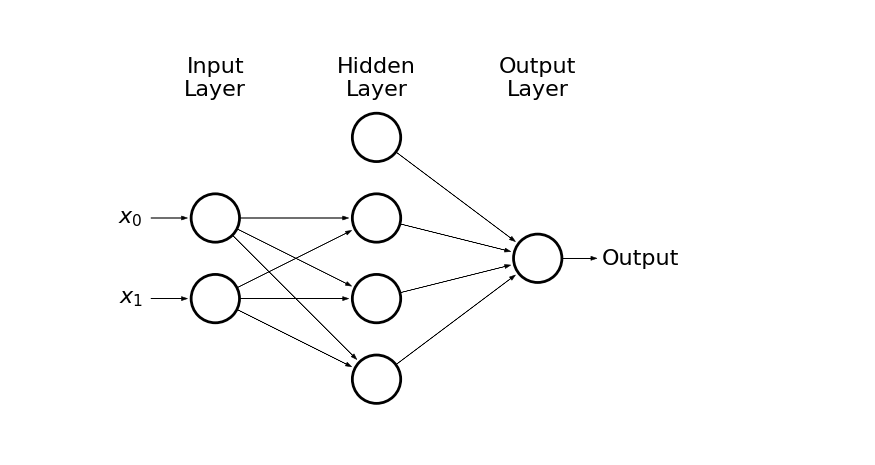

In [220]:
draw_net(2, 1, [4], w=10)

* Lets implement above network in `tensorflow`

In [0]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([1, 3]), name='w1')
w2 = tf.Variable(tf.random_normal([3, 1]), name='w2')

b1 = tf.Variable(tf.random_normal([3]), name='b1')
b2 = tf.Variable(tf.random_normal([1]), name='b2')

h = tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1))
o = tf.add(tf.matmul(h, w2), b2)

xent = tf.losses.mean_squared_error(y, o)
cost = tf.reduce_mean(xent)

opt = tf.train.GradientDescentOptimizer(0.25).minimize(cost)

init = tf.global_variables_initializer()

* We need to reshape out training data

In [39]:
X_train = np.reshape(X, (-1,1))
Y_train = np.reshape(Y, (-1,1))

print("Original", X[:5], Y[:5], sep='\n\n')
print("\nReshaped", X_train[:5], Y_train[:5], sep='\n\n')

Original

[ 0.52226483  0.80798072  0.15974077 -0.50709742  0.78635136]

[ 0.97538575  0.83448142  0.4117488  -0.89203221  0.38857674]

Reshaped

[[ 0.52226483]
 [ 0.80798072]
 [ 0.15974077]
 [-0.50709742]
 [ 0.78635136]]

[[ 0.97538575]
 [ 0.83448142]
 [ 0.4117488 ]
 [-0.89203221]
 [ 0.38857674]]


* And we can train the model

In [0]:
X_test = np.arange(-1, 1, 0.01).reshape(-1,1)

with tf.Session() as sess:
  sess.run(init)

  [sess.run(opt, feed_dict={x: X_train, y: Y_train}) for _ in range(10000)]
    
  prediction = sess.run(o, feed_dict={x: X_test})

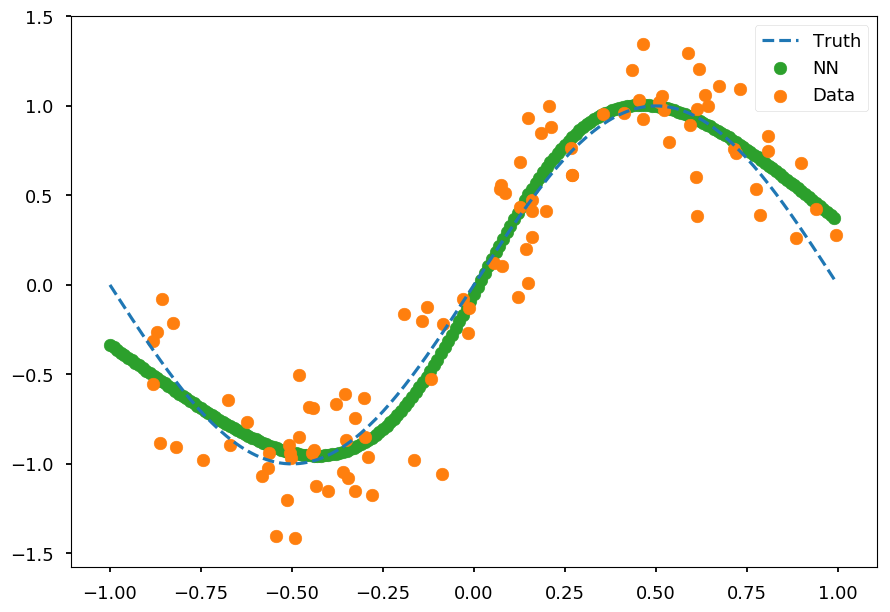

In [41]:
plt.scatter(X_test, prediction, color='C2', label='NN')
plt.scatter(X, Y, color='C1', label='Data')
plt.plot(x_, np.sin(np.pi * x_), 'C0--', label='Truth')

plt.legend();

## More examples

* The lecturer was too lazy to prepare more examples, but we can play in [tensorflow playground](https://playground.tensorflow.org/), which has awesome visualizations

## MNIST

* [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)

> The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

> It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

* We can grab MNIST dataset using `tensorflow.examples.tutorials.mnist`

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# to avoid warnings printed in the notebook
tf.logging.set_verbosity(tf.logging.ERROR)

# one hot -> label 0-9 -> 0...01, 0...10, ...
mnist = input_data.read_data_sets("/tmp/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/t10k-labels-idx1-ubyte.gz


* Lets see how data looks like

In [11]:
print(mnist.train.images.shape)

(55000, 784)


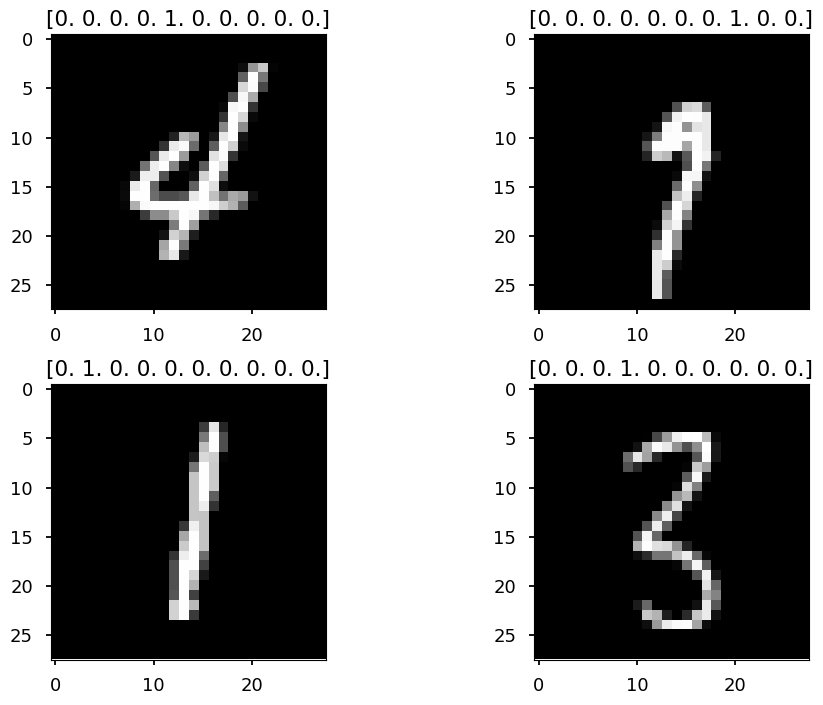

In [10]:
for i in range(4):
  plt.subplot(221 + i)
  
  # random training sample
  index = np.random.randint(len(mnist.train.images))
  
  # train.images contains images in a form of a vector
  # so we reshape it back to 28x28
  plt.imshow(mnist.train.images[index].reshape(28, 28), cmap='gray')
  
  # train.labels contains labels in one hot format
  plt.title(mnist.train.labels[index])
  
plt.tight_layout();

* Today we solve this classification problem with `softmax`

* During next lecture we apply convolutional NN on MNIST dataset

* Lets start building the model

In [0]:
x = tf.placeholder(tf.float32, [None, 784])  # img -> 28x28 -> 784
y = tf.placeholder(tf.float32, [None, 10])   # 10 classes

W = tf.Variable(tf.zeros([784, 10]))  # weights
b = tf.Variable(tf.zeros([10]))       # bias

out = tf.nn.softmax(tf.matmul(x, W) + b)

* Define the loss function and optimizer

In [0]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=out)
)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

* Train the model

In [0]:
# create a session
sess =  tf.Session()
# initialize weights
sess.run(tf.global_variables_initializer())

for _ in range(10000):
  # here instead of updating weights after the whole training set
  # we use batch size 100 (more about that in the next section)
  batch_xs, batch_ys = mnist.train.next_batch(100)
  
  # train_step is minimizing cross_entropy with learning rate 0.5 using GD
  # we pass small batches to placeholders x and y
  sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})

* Validate the model

In [55]:
# argmax returns the index of the heighest index in a tensor
# equal returns True / False if prediction is equal/not equal to true label
# cast would convert True/False to 1/0, so we can calculate the average
correct_prediction = tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

sess.close()

0.9241


* It is pretty crazy what you can do with modern ML/DL frameworks

* We have just learned our computer to recognize handwritten digits with a few lines of code

* During next lecture we will improve the accuracy using deep neural networks

## Gradient descent variations

* In the **gradient descent** (GD) method weights are updated after a full loop over training data: <p align="center"><br>$W \rightarrow W - \alpha\cdot\nabla_W L(W)$</p><br>

* In the **stochastic gradient descent** (SGD) method weights are updated for each training sample: <p align="center"><br>$W \rightarrow W - \alpha\cdot\nabla_W L(W; x^{(i)}; y^{(i)})$</p><br>

* Note, that SGD is also called **online learning**

* For the large dataset it is likely that GD would recompute gradients for similar examples before an update

* SGD perform frequent updates but with a high variance, so objective function fluctuates

* It may help to escape local minima

* The common method, which is somehow between GD and SGD, is **mini-batch gradient descent** (MBGD) - the one we used for MNIST example: <p align="center"><br>$W \rightarrow W - \alpha\cdot\nabla_W L(W; x^{(i; i+n)}; y^{(i; i+n)})$</p><br>

### SGD on MNIST

* Lets see how the loss function looks like when applying SGD for training the network on MNIST data

In [0]:
# create a session
sess =  tf.Session()
# initialize weights
sess.run(tf.global_variables_initializer())

test_loss = []  # placeholder for loss value per iteration

for _ in range(10000):
  # SGD -> batch size = 1
  batch_xs, batch_ys = mnist.train.next_batch(1)  
  # update weights
  sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})
  # calculate loss funtion on test samples
  loss = sess.run(cross_entropy,
                  feed_dict={x: mnist.test.images, y: mnist.test.labels})
  # save it  
  test_loss.append(loss)

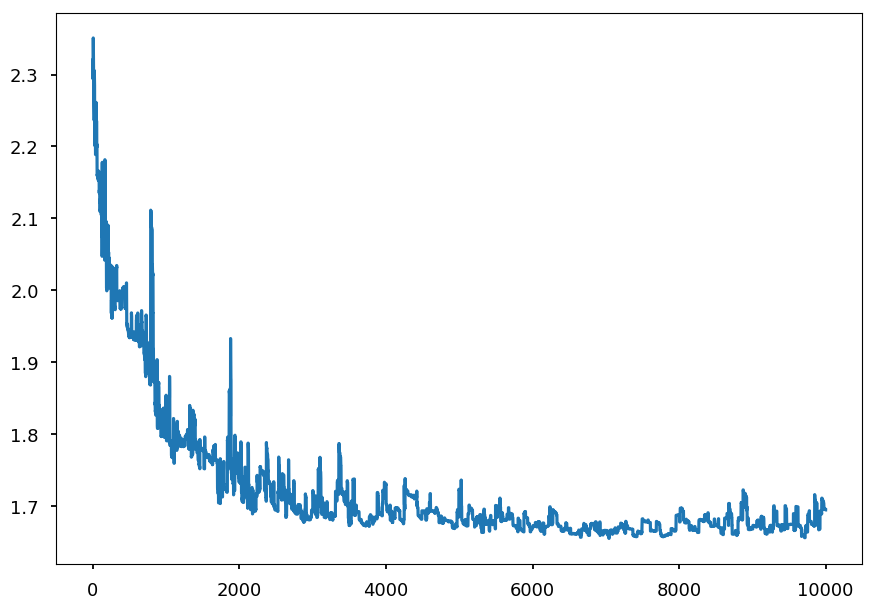

In [36]:
plt.plot(np.arange(0, 10000, 1), test_loss);

### Momentum

*  Online learning may help to escape local minima

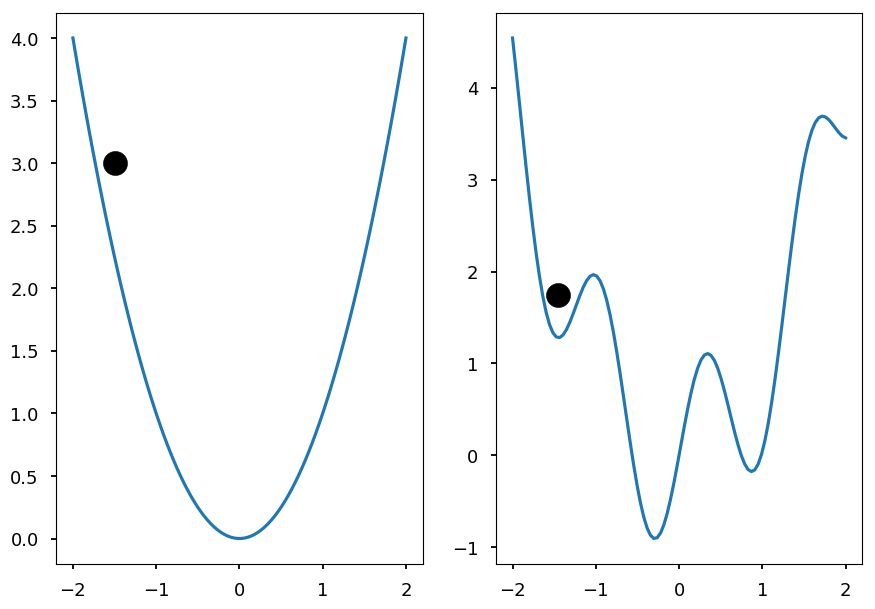

In [47]:
x = np.linspace(-2, 2, 100)
y1 = x**2
y2 = np.array([a**2 + np.sin(5*a) for a in x])

plt.subplot(121)
plt.plot(x, y1)
plt.scatter([-1.5], [3], c='k', s=300)

plt.subplot(122)
plt.plot(x, y2)
plt.scatter([-1.45], [1.75], c='k', s=300);

* Another technique that can help escape local minima is to use a momentum term

<p align="center"><br>$\begin{eqnarray}
v_t & = & \gamma\cdot v_{t-1} + \alpha\cdot\nabla_W L(W; x^{(i)}; y^{(i)}) \\
W &\rightarrow& W - v_t
\end{eqnarray}$</p><br>

* It is like pushing a ball down a hill and ball accumulates momentum

* $\gamma$ is another hyperparameter, usually set around $0.9$

* One may want a smarter ball, which can predict its future position

* The future position is approximate by $W - \gamma\cdot v_{t-1}$

* **Nesterov accelerated gradient** calculates gradient **not** w.r.t current weights, but w.r.t approximated future  values:

<p align="center"><br>$\begin{eqnarray}
v_t & = & \gamma\cdot v_{t-1} + \alpha\cdot\nabla_W L(W - \gamma\cdot v_{t-1} ; x^{(i)}; y^{(i)}) \\
W &\rightarrow& W - v_t
\end{eqnarray}$</p><br>

### Adaptive models

* A drawback of *regular* gradient descent methods is a constant learning rate, which needs to be tuned by hand

    * if too small the training process is long
 
    * if too large the minimum may be skipped
 
* There are several algorithms which adapt the learning rate during training

* Adagrad, Adadelta, Adam are presented here, but please note there are more available

#### Adagrad

* Let $g_{ti}$ be the gradient of the objective function w.r.t the weight $W_i$ at time step $t$: <p align="center"><br>$g_{ti} = \nabla_WL(W_{t,i})$</p><br>

* In this notation, SGD step for a parameter $i$ can be written as:  <p align="center"><br>$W_{t+1, i} = W_{t,i} - \alpha g_{ti}$</p><br>

* Adagrad modifies the learning rate $\alpha$ based on previous gradients: <p align="center"><br>$W_{t+1, i} = W_{t,i} - \frac{\alpha}{\sqrt{G_{t,ii} + \varepsilon}} g_{ti}$</p><br>

* Where $G_{t}$ is a diagonal matrix, where $i, i$ elements are equal to the sum of all gradients w.r.t $W_i$ up to step $t$

* $\varepsilon$ is just to ensure denominator not equal zero

* Since $G_t$ is diagonal, we can write the general formula using element-wise product: <p align="center"><br>$W_{t+1} = W_{t}- \frac{\alpha}{\sqrt{G_{t} + \varepsilon}} \odot g_{t}$</p><br>

* Note, that each weight has now its own training rate; they just share initial value $\alpha$

* There is no need to tune $\alpha$ anymore; usually one set it up to be around $0.01$ and let Adagrad do the job

* The disadvantage of Adagrad is that it accumulates squares of gradients in the denominator - at some point training rate is so small that the model is unable to learn anythng new

#### Adadelta

* Adadelta is an extension of Adagrad

* Its goal is to reduce the speed of training rate decreasing

* The idea is to accumulate just a few last gradients instead all of them

* Since it is highly inefficient, Adagrad implements this as an exponentially decaying average of all the squared gradients

* Let $E[g^2]_t$ be the average of the squared greadients up to step $t$

* Let $\gamma$ be decay constant (similar to momentum), then: <p align="center"><br>$E[g^2]_t = \gamma\cdot E[g^2]_{t-1} + (1 - \gamma)\cdot g_t^2$</p><br>

* And the training step is given by: <p align="center"><br>$W_{t+1} = W_{t}- \frac{\alpha}{\sqrt{E[g^2]_t + \varepsilon}}  g_{t}$</p><br>

* Please note, that the denominator is just root mean squared (RMS) of the gradient:  <p align="center"><br>$W_{t+1} = W_{t}- \frac{\alpha}{RMS[g]_t}  g_{t}$</p><br>

* The author also note that in GD-like methods the update has different hypothetical units than weights itself: <p align="center"><br>$units~of~\Delta w \sim units~of~g \sim units~of~\frac{\partial L}{\partial w} \sim \frac{1}{units~of~w}$</p><br>

* Inspired by second order optimization method that using Hessian information (like Newton's method): <p align="center"><br>$units~of~\Delta w \sim units~of~H^{-1}g \sim units~of~\frac{\frac{\partial L}{\partial w}}{\frac{\partial^2L}{\partial w^2}} \sim units~of~w$</p><br>

* the nominator is replaced by RMS of of weights updates (assuming diagonal Hessian): <p align="center"><br>$\Delta w = \frac{\frac{\partial L}{\partial w}}{\frac{\partial^2 L}{\partial w^2}} \Rightarrow \frac{1}{\frac{\partial^2 L}{\partial w^2}} = \frac{\Delta w}{\frac{\partial L}{\partial w}}$</p><br>

* Since current update is not known until step is done, the following approximation is used: <p align="center"><br>$\Delta W_t = - \frac{RMS[\Delta W]_{t-1}}{RMS[g]_t}  g_{t}$</p><br>

* Please note, that Adagrad does not require initial training rate!

* Although, it is still not parameter-free model as one need to set up $\gamma$ and $\varepsilon$

#### Adam

* Similar to Adedelta Adam uses exponentially decaying average of past sqaured gradients $v_t$ (notation from the original paper): <p align="center"><br>$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2)\cdot g_t^2$</p><br>

* And similar to SGD with momentum Adam also keeps information about past gradients: <p align="center"><br>$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1)\cdot g_t$</p><br>

* $m_t$ and $v_t$ are initialized with zeros

* For $\beta_{1,2}\sim 1$ training is slow at the beginning

* Thus, bias-corrected first and second moments are introduced:

<p align="center"><br>$\begin{eqnarray}
\hat m_t & = & \frac{m_t}{1 - \beta_1^t} \\
\hat v_t & = & \frac{v_t}{1 - \beta_2^t}
\end{eqnarray}$</p><br>

* And the update rule is given by: <p align="center"><br>$\Delta W_{t+1} = W_t - \frac{\alpha}{\sqrt{\hat v_t} + \varepsilon}\hat m_t$</p><br>

* The authors suggest $\beta_1 \approx 0.9$, $\beta_2 \approx 0.999$, and $\varepsilon\approx 10^{-8}$

## Regularization

* As mentioned during last lecture, regularization is any modification to learning algorithm made to prevent overfitting

* The common method is to add **regularization term** (**regularizer**) to a loss function $L(W)$: <p align="center"><br>$L(W) \rightarrow L(W) + \alpha R(W)$</p><br>

* Two common regularizer are $L1$ or $L2$ norms

* **Ridge** regression uses $L2$ regularization: $R(W) = \sum\limits_i W_i^2$

* **Lasso** regression uses $L1$ regularization: $R(W) = \sum\limits_i |W_i|$

* Why to penalize the magnitude of weights?

* Lets consider a simple example

### To regularize or not to regularize

* Lets consider again *sinus* dataset

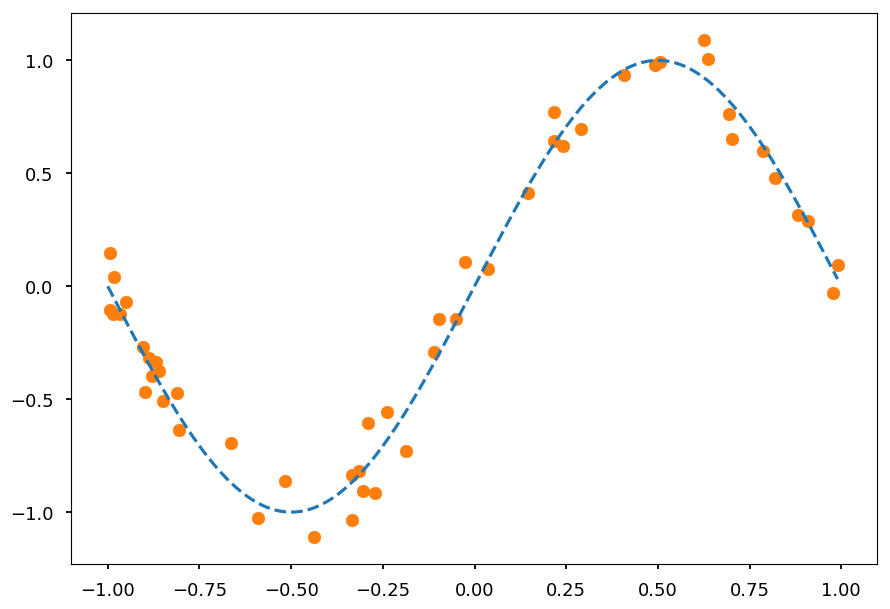

In [82]:
from math import sin, cos, pi, exp

def get_dataset(N=20, sigma=0.1):
  """Generate N training samples"""
  # X is a set of random points from [-1, 1]
  X = 2 * np.random.sample(N) - 1
  # Y are corresponding target values (with noise included)
  Y = np.array([sin(pi*x) + np.random.normal(0, sigma) for x in X])

  return X, Y

# plot a sample
X, Y = get_dataset(50)

x_ = np.arange(-1, 1, 0.01)

plt.scatter(X, Y, color='C1')
plt.plot(x_, np.sin(np.pi * x_), 'C0--');

* Lets fit data to polynomial of order 20

In [0]:
N = 20  # polynomial order

# add powers of x 
X_train = [[x**i for i in range(1, N)] for x in X]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y);

* And plot prediction together with training data

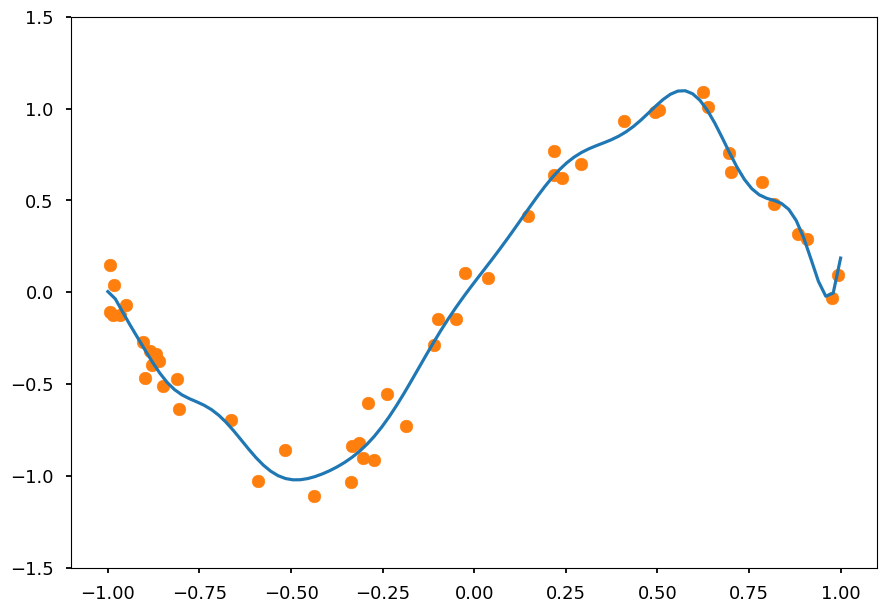

In [91]:
X_test = np.linspace(-1, 1, 100)
Y_test = reg.predict([[x**i for i in range(1,N)] for x in X_test])

plt.ylim([-1.5, 1.5])

plt.scatter(X, Y, color='C1')
plt.plot(X_test, Y_test, 'C0');

* It is clearly overfitted

* Lets do the same using Ridge regression

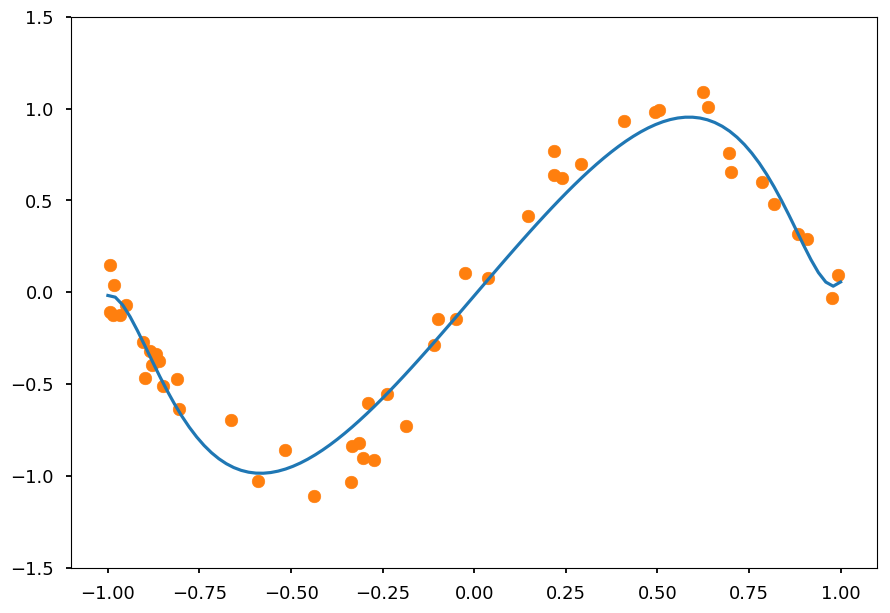

In [92]:
from sklearn.linear_model import Ridge

reg_l2 = Ridge(alpha=0.1)
reg_l2.fit(X_train, Y)

Y_test = reg_l2.predict([[x**i for i in range(1,N)] for x in X_test])

plt.ylim([-1.5, 1.5])

plt.scatter(X, Y, color='C1')
plt.plot(X_test, Y_test, 'C0');

* Play on your own with $\lambda$ to see how it affects the result

* Now, take a look at coefficients without regularizer

In [93]:
reg.coef_

array([ 2.60931184e+00, -1.34651207e+00,  2.04999890e+01,  9.00515668e+00,
       -4.18472051e+02, -1.27117676e+02,  3.14310368e+03,  1.10582631e+03,
       -1.24897897e+04, -4.36716920e+03,  2.86984815e+04,  8.89018057e+03,
       -3.94741356e+04, -9.78295086e+03,  3.21343881e+04,  5.54204833e+03,
       -1.43111414e+04, -1.26843444e+03,  2.69454755e+03])

* Note, that coefficients increase drastically for large powers of $x$

* High weights mean that a model put a lot of emphasis on a given features, which leads to overfitting

* That is why we need to put some constraints on the magnitude of weights

* Now, lets see how coefficients look like with L2 regularizer

In [94]:
reg_l2.coef_

array([ 2.3350277 , -0.00324186, -1.57606849,  0.04982775, -1.0117878 ,
       -0.025911  , -0.4412411 , -0.04283921, -0.10340078, -0.03155621,
        0.07582327, -0.01138888,  0.16245585,  0.01121341,  0.19718257,
        0.03442763,  0.20359299,  0.05769045,  0.19518384])

* Ridge regression causes coefficient shrinkage and reduces model complexity

* Lets repeat the same for Lasso regression

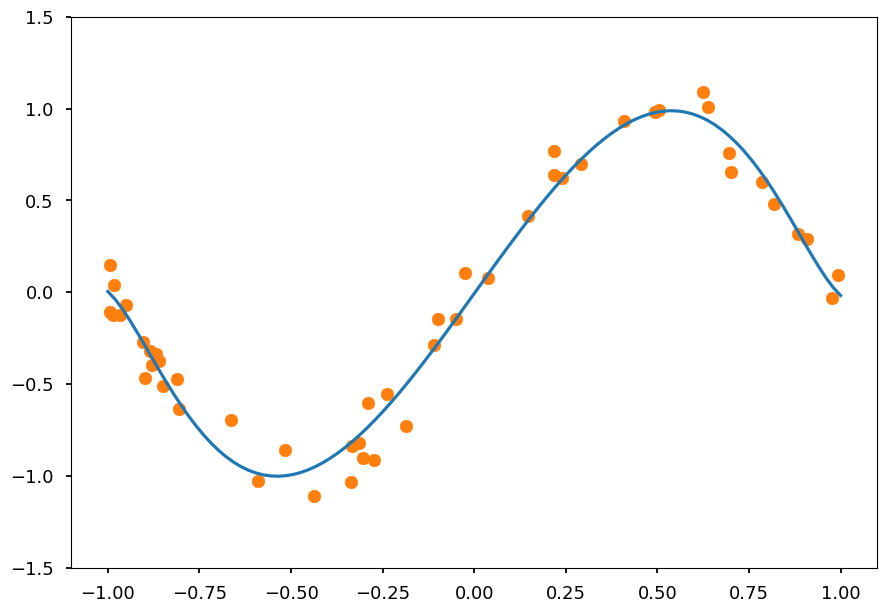

In [97]:
from sklearn.linear_model import Lasso

reg_l1 = Lasso(alpha=0.001)
reg_l1.fit(X_train, Y)

Y_test = reg_l1.predict([[x**i for i in range(1,N)] for x in X_test])

plt.ylim([-1.5, 1.5])

plt.scatter(X, Y, color='C1')
plt.plot(X_test, Y_test, 'C0');

* Once again we got a nice fit

* But there is a difference - see the coefficients

In [99]:
reg_l1.coef_

array([ 2.779238  , -0.        , -3.20859903, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.1980417 ,  0.        ,  0.22056433,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

* Note, that in opposite to Ridge not all features are taken into account as some weights ended up being zero

* Thus, Lasso regression additionally performs features selection, which is useful for data with many features

## Summary

* Neural networks are one of the most popular machine learning method these days

* Note, that NN has much more hyperparameters than models described so far:

    * number of hidden layers
 
    * number of neurons
 
    * activation functions
 
    * learning algorithm settings (model, learning rate, momentum etc)
 
    * regularization method and its parameters
 
    * batch size in mini-batch gradient descent
 
* It is crucial to use cross-validation for hyperparameter tuning

* Next week "we need to go deeper"